# Data Analyst & Data Engineer

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# Download latest version
path = kagglehub.dataset_download("lucasgreenwell/depression-anxiety-stress-scales-responses")

print("Path to dataset files:", path)

100%|██████████| 7.93M/7.93M [00:00<00:00, 95.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lucasgreenwell/depression-anxiety-stress-scales-responses/versions/1


In [ ]:
data_file_path = f"{path}/data.csv"

df = pd.read_csv(data_file_path, sep='\t')
df.head()

Q1A  Q1I   Q1E  Q2A  Q2I   Q2E  Q3A  Q3I   Q3E  Q4A  ...  screensize  \
0    4   28  3890    4   25  2122    2   16  1944    4  ...           1   
1    4    2  8118    1   36  2890    2   35  4777    3  ...           2   
2    3    7  5784    1   33  4373    4   41  3242    1  ...           2   
3    2   23  5081    3   11  6837    2   37  5521    1  ...           2   
4    2   36  3215    2   13  7731    3    5  4156    4  ...           2   

   uniquenetworklocation  hand  religion  orientation  race  voted  married  \
0                      1     1        12            1    10      2        1   
1                      1     2         7            0    70      2        1   
2                      1     1         4            3    60      1        1   
3                      1     2         4            5    70      2        1   
4                      2     3        10            1    10      2        1   

   familysize       major  
0           2         NaN  
1           4         NaN  
2           3         NaN  
3           5     biology  
4           4  Psychology  

[5 rows x 172 columns]

In [ ]:
df.info()
df.shape
print("Header Kolom : ", df.columns.to_list())
print("Jumlah Kolom : ", len(df.columns))
print("Jumlah Responden : ", len(df))
print("Jumlah Data Kosong Keseluruhan : ", len(df[df.isnull().any(axis=1)]))
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB
Header Kolom :  ['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A', 'Q4I', 'Q4E', 'Q5A', 'Q5I', 'Q5E', 'Q6A', 'Q6I', 'Q6E', 'Q7A', 'Q7I', 'Q7E', 'Q8A', 'Q8I', 'Q8E', 'Q9A', 'Q9I', 'Q9E', 'Q10A', 'Q10I', 'Q10E', 'Q11A', 'Q11I', 'Q11E', 'Q12A', 'Q12I', 'Q12E', 'Q13A', 'Q13I', 'Q13E', 'Q14A', 'Q14I', 'Q14E', 'Q15A', 'Q15I', 'Q15E', 'Q16A', 'Q16I', 'Q16E', 'Q17A', 'Q17I', 'Q17E', 'Q18A', 'Q18I', 'Q18E', 'Q19A', 'Q19I', 'Q19E', 'Q20A', 'Q20I', 'Q20E', 'Q21A', 'Q21I', 'Q21E', 'Q22A', 'Q22I', 'Q22E', 'Q23A', 'Q23I', 'Q23E', 'Q24A', 'Q24I', 'Q24E', 'Q25A', 'Q25I', 'Q25E', 'Q26A', 'Q26I', 'Q26E', 'Q27A', 'Q27I', 'Q27E', 'Q28A', 'Q28I', 'Q28E', 'Q29A', 'Q29I', 'Q29E', 'Q30A', 'Q30I', 'Q30E', 'Q31A', 'Q31I', 'Q31E', 'Q32A', 'Q32I', 'Q32E', 'Q33A', 'Q33I', 'Q33E', 'Q34A', 'Q34I', 'Q34E', 'Q35A', 'Q35I', 'Q35E', 'Q36A'

Q1A           Q1I           Q1E           Q2A           Q2I  \
count  39775.000000  39775.000000  3.977500e+04  39775.000000  39775.000000   
mean       2.619485     21.555977  6.970591e+03      2.172269     21.248070   
std        1.032117     12.133621  8.670513e+04      1.111563     12.125288   
min        1.000000      1.000000  1.800000e+02      1.000000      1.000000   
25%        2.000000     11.000000  2.664000e+03      1.000000     11.000000   
50%        3.000000     22.000000  3.609000e+03      2.000000     21.000000   
75%        4.000000     32.000000  5.358000e+03      3.000000     32.000000   
max        4.000000     42.000000  1.210228e+07      4.000000     42.000000   

                Q2E           Q3A           Q3I           Q3E           Q4A  \
count  3.977500e+04  39775.000000  39775.000000  3.977500e+04  39775.000000   
mean   5.332376e+03      2.226097     21.583004  7.426446e+03      1.950170   
std    2.651361e+04      1.038526     12.115637  1.587024e+05      1.042218   
min    1.760000e+02      1.000000      1.000000 -1.081400e+04      1.000000   
25%    2.477000e+03      1.000000     11.000000  2.857000e+03      1.000000   
50%    3.511000e+03      2.000000     22.000000  3.898000e+03      2.000000   
75%    5.216000e+03      3.000000     32.000000  5.766000e+03      3.000000   
max    2.161057e+06      4.000000     42.000000  2.858269e+07      4.000000   

       ...           age    screensize  uniquenetworklocation         hand  \
count  ...  39775.000000  39775.000000           39775.000000  39775.00000   
mean   ...     23.612168      1.274519               1.200025      1.13516   
std    ...     21.581722      0.446277               0.400024      0.40030   
min    ...     13.000000      1.000000               1.000000      0.00000   
25%    ...     18.000000      1.000000               1.000000      1.00000   
50%    ...     21.000000      1.000000               1.000000      1.00000   
75%    ...     25.000000      2.000000               1.000000      1.00000   
max    ...   1998.000000      2.000000               2.000000      3.00000   

           religion   orientation          race         voted       married  \
count  39775.000000  39775.000000  39775.000000  39775.000000  39775.000000   
mean       7.555852      1.642992     31.312885      1.705795      1.159547   
std        3.554395      1.351362     25.871272      0.473388      0.445882   
min        0.000000      0.000000     10.000000      0.000000      0.000000   
25%        4.000000      1.000000     10.000000      1.000000      1.000000   
50%       10.000000      1.000000     10.000000      2.000000      1.000000   
75%       10.000000      2.000000     60.000000      2.000000      1.000000   
max       12.000000      5.000000     70.000000      2.000000      3.000000   

         familysize  
count  39775.000000  
mean       3.510270  
std        2.141518  
min        0.000000  
25%        2.000000  
50%        3.000000  
75%        4.000000  
max      133.000000  

[8 rows x 170 columns]

Filtering & Cleaning

In [ ]:
df_filtered = df.copy()

In [ ]:
# Filter : Responden yang tidak valid berdasarkan Vocabulary Check List (VCL)
# Responden yang memilih kata palsu (VCL6, VCL9, VCL12) dianggap tidak valid.
invalid_vcl_mask = (df_filtered['VCL6'] == 1) | \
                   (df_filtered['VCL9'] == 1) | \
                   (df_filtered['VCL12'] == 1)
rows_before = len(df_filtered)
df_filtered = df_filtered[~invalid_vcl_mask]
rows_after = len(df_filtered)
print(f"   -> Filter VCL: {rows_before - rows_after} responden tidak valid dihapus.")

   -> Filter VCL: 5192 responden tidak valid dihapus.


Pemilihan Fitur

In [ ]:
health_features_cols = [f'Q{i}A' for i in range(1, 43)]

profiling_cols = ['education', 'urban', 'gender', 'age', 'hand', 'religion',
                  'orientation', 'race', 'voted', 'married', 'familysize'] + \
                 [f'TIPI{i}' for i in range(1, 11)]

In [ ]:
df_final = df_filtered[health_features_cols + profiling_cols].copy()
df_final.dropna(subset=health_features_cols, inplace=True)

In [ ]:
# Cek missing values HANYA pada kolom fitur health
missing_values_count = df_final[health_features_cols].isnull().sum().sum()
print(f"\nMenangani missing values pada fitur stres...")
print(f"   -> Ditemukan {missing_values_count} missing values pada kolom-kolom stres.")


Menangani missing values pada fitur stres...
   -> Ditemukan 0 missing values pada kolom-kolom stres.


Scaling (Normalisasi Fitur)

In [ ]:
# Pisahkan fitur yang akan dicluster
X = df_final[health_features_cols]

# Lakukan scaling. Ini penting agar semua fitur punya bobot yang sama dalam model K-Means.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Buat datafrane dari data yang sudah discaling
df_scaled_features = pd.DataFrame(X_scaled, columns=health_features_cols, index=df_final.index)

# Tampilkan head dari data yang sudah discaling
display(df_scaled_features.head())

Q1A       Q2A       Q3A       Q4A       Q5A       Q6A       Q7A  \
0  1.340379  1.653906 -0.206921  2.002229  1.403513  1.400492  2.051719   
1  1.340379 -1.053133 -0.206921  1.033821  1.403513  1.400492  1.072657   
2  0.367101 -1.053133  1.732623 -0.902994  1.403513  0.443957 -0.885468   
3 -0.606177  0.751560 -0.206921 -0.902994  0.465242  0.443957  2.051719   
4 -0.606177 -0.150787  0.762851  2.002229  1.403513 -0.512579  2.051719   

        Q8A       Q9A      Q10A  ...      Q33A      Q34A      Q35A      Q36A  \
0  1.471134 -0.624170 -1.267216  ... -0.378838  0.322677  1.727632  1.569995   
1  1.471134  0.314991 -0.385514  ...  0.578583 -0.548382 -0.292817  0.663126   
2  0.516232 -0.624170  1.377891  ... -1.336258  1.193736  0.717408  1.569995   
3 -0.438670  0.314991  0.496189  ... -0.378838  1.193736 -1.303042 -1.150611   
4  1.471134  1.254151  0.496189  ...  1.536003  1.193736  0.717408  1.569995   

       Q37A      Q38A      Q39A      Q40A      Q41A      Q42A  
0 -1.203503 -0.322481  1.545295  0.317996  1.989147  1.301599  
1  1.436570 -0.322481 -0.425968 -1.497330  0.055521 -0.643194  
2  1.436570  1.367783 -0.425968 -0.589667 -0.911292  1.301599  
3 -0.323479 -1.167613  0.559663  1.225658  1.989147 -0.643194  
4  0.556545  0.522651  0.559663  1.225658  1.989147  0.329203  

[5 rows x 42 columns]

Penyeimbangan ADASYN

In [ ]:
# hitung skor stres
df_filtered['stress_total'] = df_filtered[health_features_cols].sum(axis=1)

In [ ]:
# label stres untuk adasyn
# Kategorisasi skor total menjadi label stres (sintetis)
bins = [0, 80, 120, 210]
labels = ['rendah', 'sedang', 'tinggi']
df_filtered['stress_level'] = pd.cut(df_filtered['stress_total'], bins=bins, labels=labels)

In [ ]:
display(df_filtered['stress_total'].head())

0    143
1    110
2    110
3     91
4    143
Name: stress_total, dtype: int64

In [ ]:
# penerapan adasyn
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_scaled, df_filtered['stress_level'])

print("Sebelum ADASYN:", df_filtered['stress_level'].value_counts())
print("Setelah ADASYN:", pd.Series(y_resampled).value_counts())

Sebelum ADASYN: stress_level
sedang    15205
rendah    10131
tinggi     9247
Name: count, dtype: int64
Setelah ADASYN: stress_level
tinggi    15623
rendah    15446
sedang    15205
Name: count, dtype: int64


In [ ]:
df_resampled = pd.DataFrame(X_resampled, columns=health_features_cols)
df_resampled['stress_level'] = y_resampled

In [ ]:
display(df_resampled.head())

Q1A       Q2A       Q3A       Q4A       Q5A       Q6A       Q7A  \
0  1.340379  1.653906 -0.206921  2.002229  1.403513  1.400492  2.051719   
1  1.340379 -1.053133 -0.206921  1.033821  1.403513  1.400492  1.072657   
2  0.367101 -1.053133  1.732623 -0.902994  1.403513  0.443957 -0.885468   
3 -0.606177  0.751560 -0.206921 -0.902994  0.465242  0.443957  2.051719   
4 -0.606177 -0.150787  0.762851  2.002229  1.403513 -0.512579  2.051719   

        Q8A       Q9A      Q10A  ...      Q34A      Q35A      Q36A      Q37A  \
0  1.471134 -0.624170 -1.267216  ...  0.322677  1.727632  1.569995 -1.203503   
1  1.471134  0.314991 -0.385514  ... -0.548382 -0.292817  0.663126  1.436570   
2  0.516232 -0.624170  1.377891  ...  1.193736  0.717408  1.569995  1.436570   
3 -0.438670  0.314991  0.496189  ...  1.193736 -1.303042 -1.150611 -0.323479   
4  1.471134  1.254151  0.496189  ...  1.193736  0.717408  1.569995  0.556545   

       Q38A      Q39A      Q40A      Q41A      Q42A  stress_level  
0 -0.322481  1.545295  0.317996  1.989147  1.301599        tinggi  
1 -0.322481 -0.425968 -1.497330  0.055521 -0.643194        sedang  
2  1.367783 -0.425968 -0.589667 -0.911292  1.301599        sedang  
3 -1.167613  0.559663  1.225658  1.989147 -0.643194        sedang  
4  0.522651  0.559663  1.225658  1.989147  0.329203        tinggi  

[5 rows x 43 columns]

# ML Engineer

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
X_scaled = df_resampled.iloc[:, :-1]
print(f"   -> {X_scaled.shape[1]} fitur stres telah dipisahkan untuk pemodelan")

   -> 42 fitur stres telah dipisahkan untuk pemodelan


In [ ]:
print(X_scaled.head())

        Q1A       Q2A       Q3A       Q4A       Q5A       Q6A       Q7A  \
0  1.340379  1.653906 -0.206921  2.002229  1.403513  1.400492  2.051719   
1  1.340379 -1.053133 -0.206921  1.033821  1.403513  1.400492  1.072657   
2  0.367101 -1.053133  1.732623 -0.902994  1.403513  0.443957 -0.885468   
3 -0.606177  0.751560 -0.206921 -0.902994  0.465242  0.443957  2.051719   
4 -0.606177 -0.150787  0.762851  2.002229  1.403513 -0.512579  2.051719   

        Q8A       Q9A      Q10A  ...      Q33A      Q34A      Q35A      Q36A  \
0  1.471134 -0.624170 -1.267216  ... -0.378838  0.322677  1.727632  1.569995   
1  1.471134  0.314991 -0.385514  ...  0.578583 -0.548382 -0.292817  0.663126   
2  0.516232 -0.624170  1.377891  ... -1.336258  1.193736  0.717408  1.569995   
3 -0.438670  0.314991  0.496189  ... -0.378838  1.193736 -1.303042 -1.150611   
4  1.471134  1.254151  0.496189  ...  1.536003  1.193736  0.717408  1.569995   

       Q37A      Q38A      Q39A      Q40A      Q41A      Q42A  
0 -1


Memulai pencarian jumlah cluster (k) yang optimal...


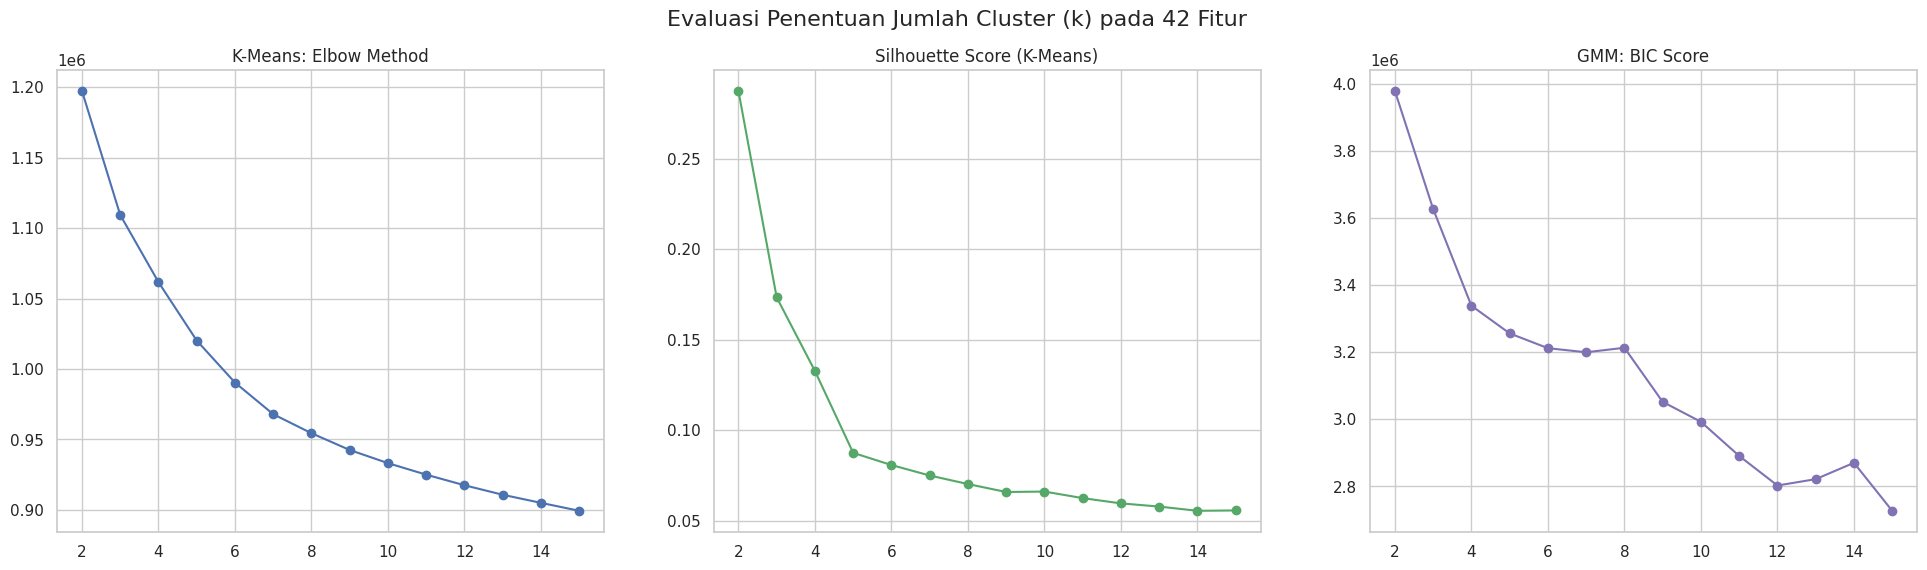

In [ ]:
print("\nMemulai pencarian jumlah cluster (k) yang optimal...")
k_range = range(2, 16)
inertia_scores = []
silhouette_scores_kmeans = []
bic_scores_gmm = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores_kmeans.append(silhouette_score(X_scaled, kmeans.labels_))
    gmm = GaussianMixture(n_components=k, random_state=42).fit(X_scaled)
    bic_scores_gmm.append(gmm.bic(X_scaled))

# Plotting hasil pencarian k
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
axes[0].plot(k_range, inertia_scores, 'bo-'); axes[0].set_title('K-Means: Elbow Method')
axes[1].plot(k_range, silhouette_scores_kmeans, 'go-'); axes[1].set_title('Silhouette Score (K-Means)')
axes[2].plot(k_range, bic_scores_gmm, 'mo-'); axes[2].set_title('GMM: BIC Score')
plt.suptitle('Evaluasi Penentuan Jumlah Cluster (k) pada 42 Fitur', fontsize=16)
plt.show()

In [ ]:
K = 4

# Melatih model final K-Means
kmeans_final = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans_labels = kmeans_final.fit_predict(X_scaled)
print("Model K-Means final berhasil dilatih.")

# Melatih model final GMM
gmm_final = GaussianMixture(n_components=K, random_state=42)
gmm_labels = gmm_final.fit_predict(X_scaled)
print("Model GMM final berhasil dilatih.")

Model K-Means final berhasil dilatih.
Model GMM final berhasil dilatih.


In [ ]:
# Memberikan label cluster ke dataset

df_labeled = df_resampled.copy()
df_labeled['kmeans_cluster'] = kmeans_labels
df_labeled['gmm_cluster'] = gmm_labels

print("\nLabel cluster dari K-Means dan GMM telah ditambahkan ke dataset.")
print("Contoh data dengan label cluster:")
display(df_labeled[['Q1A', 'kmeans_cluster', 'gmm_cluster']].head())


Label cluster dari K-Means dan GMM telah ditambahkan ke dataset.
Contoh data dengan label cluster:


Q1A  kmeans_cluster  gmm_cluster
0  1.340379               0            0
1  1.340379               1            3
2  0.367101               3            2
3 -0.606177               1            3
4 -0.606177               0            0

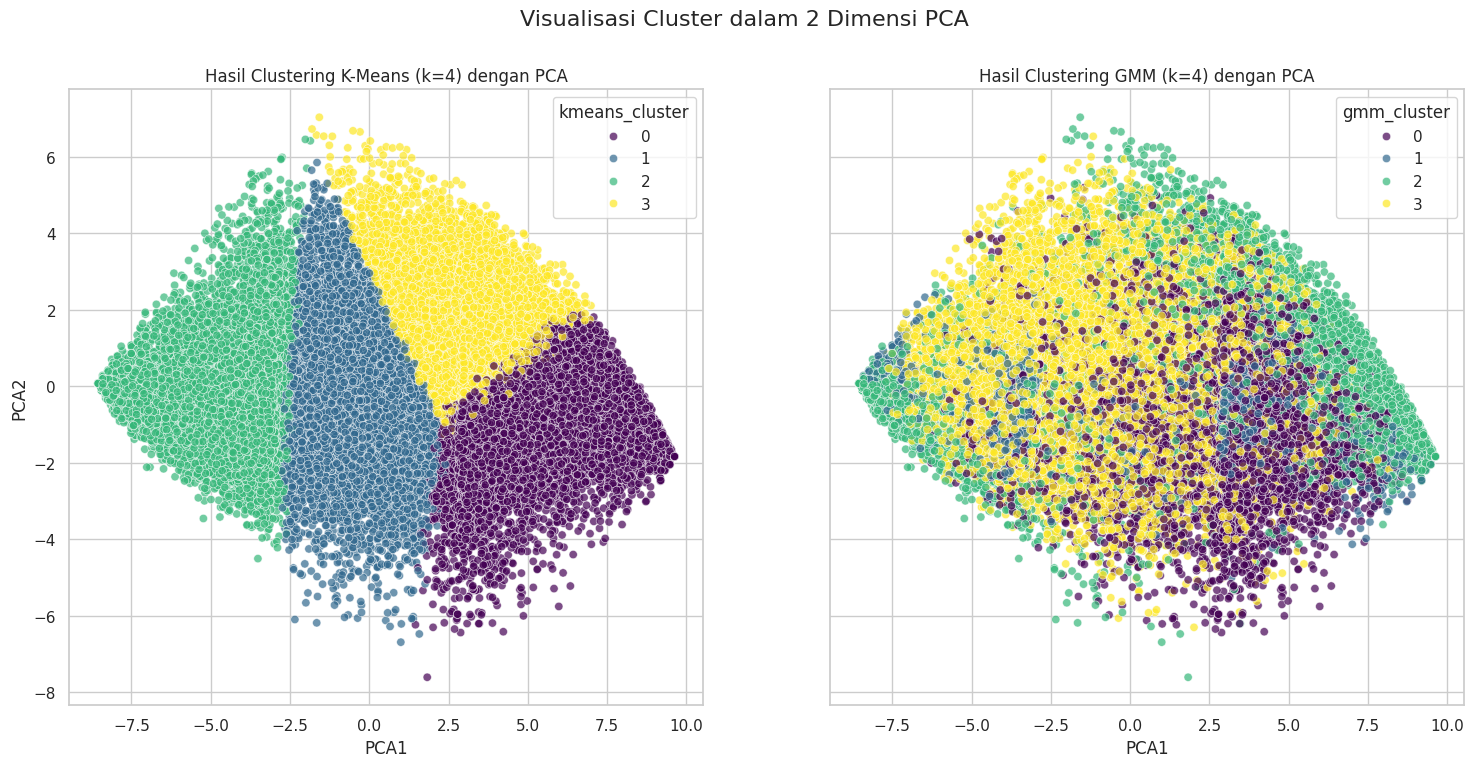

In [ ]:
# Kurangi dimensi dari 42 fitur stres menjadi 2 komponen utama untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['kmeans_cluster'] = kmeans_labels
df_pca['gmm_cluster'] = gmm_labels

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Plot K-Means
sns.scatterplot(x='PCA1', y='PCA2', hue='kmeans_cluster', data=df_pca, palette='viridis', ax=axes[0], alpha=0.7)
axes[0].set_title(f'Hasil Clustering K-Means (k={K}) dengan PCA')

# Plot GMM
sns.scatterplot(x='PCA1', y='PCA2', hue='gmm_cluster', data=df_pca, palette='viridis', ax=axes[1], alpha=0.7)
axes[1].set_title(f'Hasil Clustering GMM (k={K}) dengan PCA')

plt.suptitle('Visualisasi Cluster dalam 2 Dimensi PCA', fontsize=16)
plt.show()

# Visualisasi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur style dan ukuran plot
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

In [ ]:
df_labeled.to_csv('data_labeled.csv', index=False)

In [ ]:
df_visualisasi  = pd.read_csv('data_labeled.csv')

In [ ]:
# Mendefinisikan item per skala DASS (Diambil berdasarkan referensi)
depression_cols = [f'Q{i}A' for i in [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42]]
anxiety_cols = [f'Q{i}A' for i in [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41]]
stress_cols = [f'Q{i}A' for i in [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]]

# Menghitung skor rata-rata per skala untuk setiap cluster
cluster_profiles_agg = pd.DataFrame({
    'Depression': df_visualisasi.groupby('kmeans_cluster')[depression_cols].mean().mean(axis=1),
    'Anxiety': df_visualisasi.groupby('kmeans_cluster')[anxiety_cols].mean().mean(axis=1),
    'Stress': df_visualisasi.groupby('kmeans_cluster')[stress_cols].mean().mean(axis=1)
})

print("\nProfil Rata-rata per Skala untuk Setiap Cluster:")
display(cluster_profiles_agg)


Profil Rata-rata per Skala untuk Setiap Cluster:


Depression   Anxiety    Stress
kmeans_cluster                                
0                 0.681765  0.934123  0.821976
1                -0.139715 -0.036979  0.000807
2                -0.758673 -0.595195 -0.689905
3                 0.834879  0.141783  0.421880

K-Means

<ipython-input-36-b8fa697082d0>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row.tolist() + [row[0]]


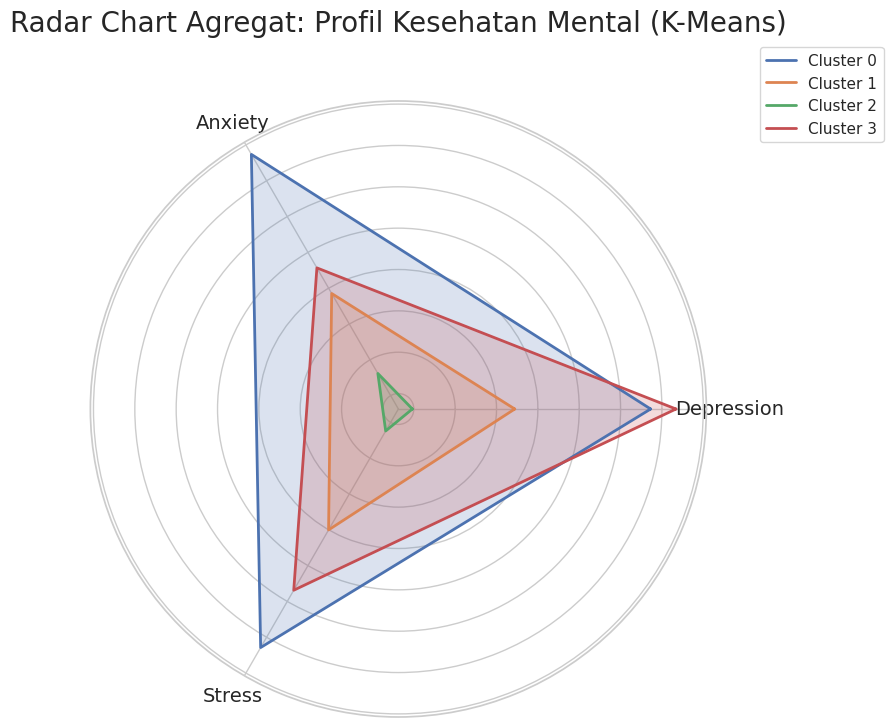

In [ ]:
labels = cluster_profiles_agg.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + [0]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, row in cluster_profiles_agg.iterrows():
    values = row.tolist() + [row[0]]
    ax.plot(angles, values, label=f'Cluster {i}', linewidth=2)
    ax.fill(angles, values, alpha=0.2)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, size=14)
plt.title('Radar Chart Agregat: Profil Kesehatan Mental (K-Means)', size=20, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

In [ ]:
df_filtered[profiling_cols].to_csv('profiling_cols.csv', index=False)

In [ ]:
# 1. Load data
labeled = pd.read_csv("data_labeled.csv")
profiling_cols = pd.read_csv("profiling_cols.csv")

# 2. Gabungkan kedua tabel (baris ke baris)
df_akhir = pd.concat([labeled, profiling_cols], axis=1)

# 3. Hapus baris yang memiliki nilai null di profiling_cols
profiling_columns = profiling_cols.columns.tolist()
df_bersih = df_akhir.dropna(subset=profiling_columns)

# 4. Cek jumlah data per cluster
print("Jumlah data per kmeans_cluster:")
print(df_bersih['kmeans_cluster'].value_counts())

Jumlah data per kmeans_cluster:
kmeans_cluster
2    11210
1    10052
0     7170
3     6151
Name: count, dtype: int64


In [ ]:
print(df_bersih.columns)

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'stress_level',
       'kmeans_cluster', 'gmm_cluster', 'education', 'urban', 'gender', 'age',
       'hand', 'religion', 'orientation', 'race', 'voted', 'married',
       'familysize', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6',
       'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10'],
      dtype='object')



Profil Rata-rata Fitur Numerik (Usia & TIPI) per Cluster:


education     urban    gender        age      hand  religion  \
kmeans_cluster                                                                 
0                2.324686  2.247699  1.877127  21.376987  1.150907  7.881172   
1                2.504676  2.230402  1.808496  22.776462  1.125547  7.743434   
2                2.694112  2.199019  1.737467  25.535682  1.117930  7.887244   
3                2.439441  2.228581  1.783125  23.602016  1.119493  7.234108   

                orientation       race     voted   married  ...     TIPI1  \
kmeans_cluster                                              ...             
0                  1.846862  30.000000  1.794142  1.090237  ...  3.489261   
1                  1.589932  29.825905  1.719260  1.141663  ...  3.859033   
2                  1.541659  29.081178  1.647458  1.220071  ...  4.249777   
3                  1.624126  32.123232  1.729312  1.115428  ...  3.215900   

                   TIPI2     TIPI3     TIPI4     TIPI5     TIPI6     TIPI7  \
kmeans_cluster                                                               
0               4.635565  4.363319  6.299303  4.385077  5.220363  5.253835   
1               4.228114  4.734978  5.414743  4.960107  4.829785  5.321628   
2               3.749063  5.157806  3.969135  5.367975  4.422926  5.339251   
3               4.352463  4.353276  5.718582  4.607381  5.235897  5.156397   

                   TIPI8     TIPI9    TIPI10  
kmeans_cluster                                
0               4.871827  2.597211  4.061785  
1               4.289992  3.579785  3.786610  
2               3.746030  4.791079  3.548260  
3               4.628028  2.920988  3.952528  

[4 rows x 21 columns]

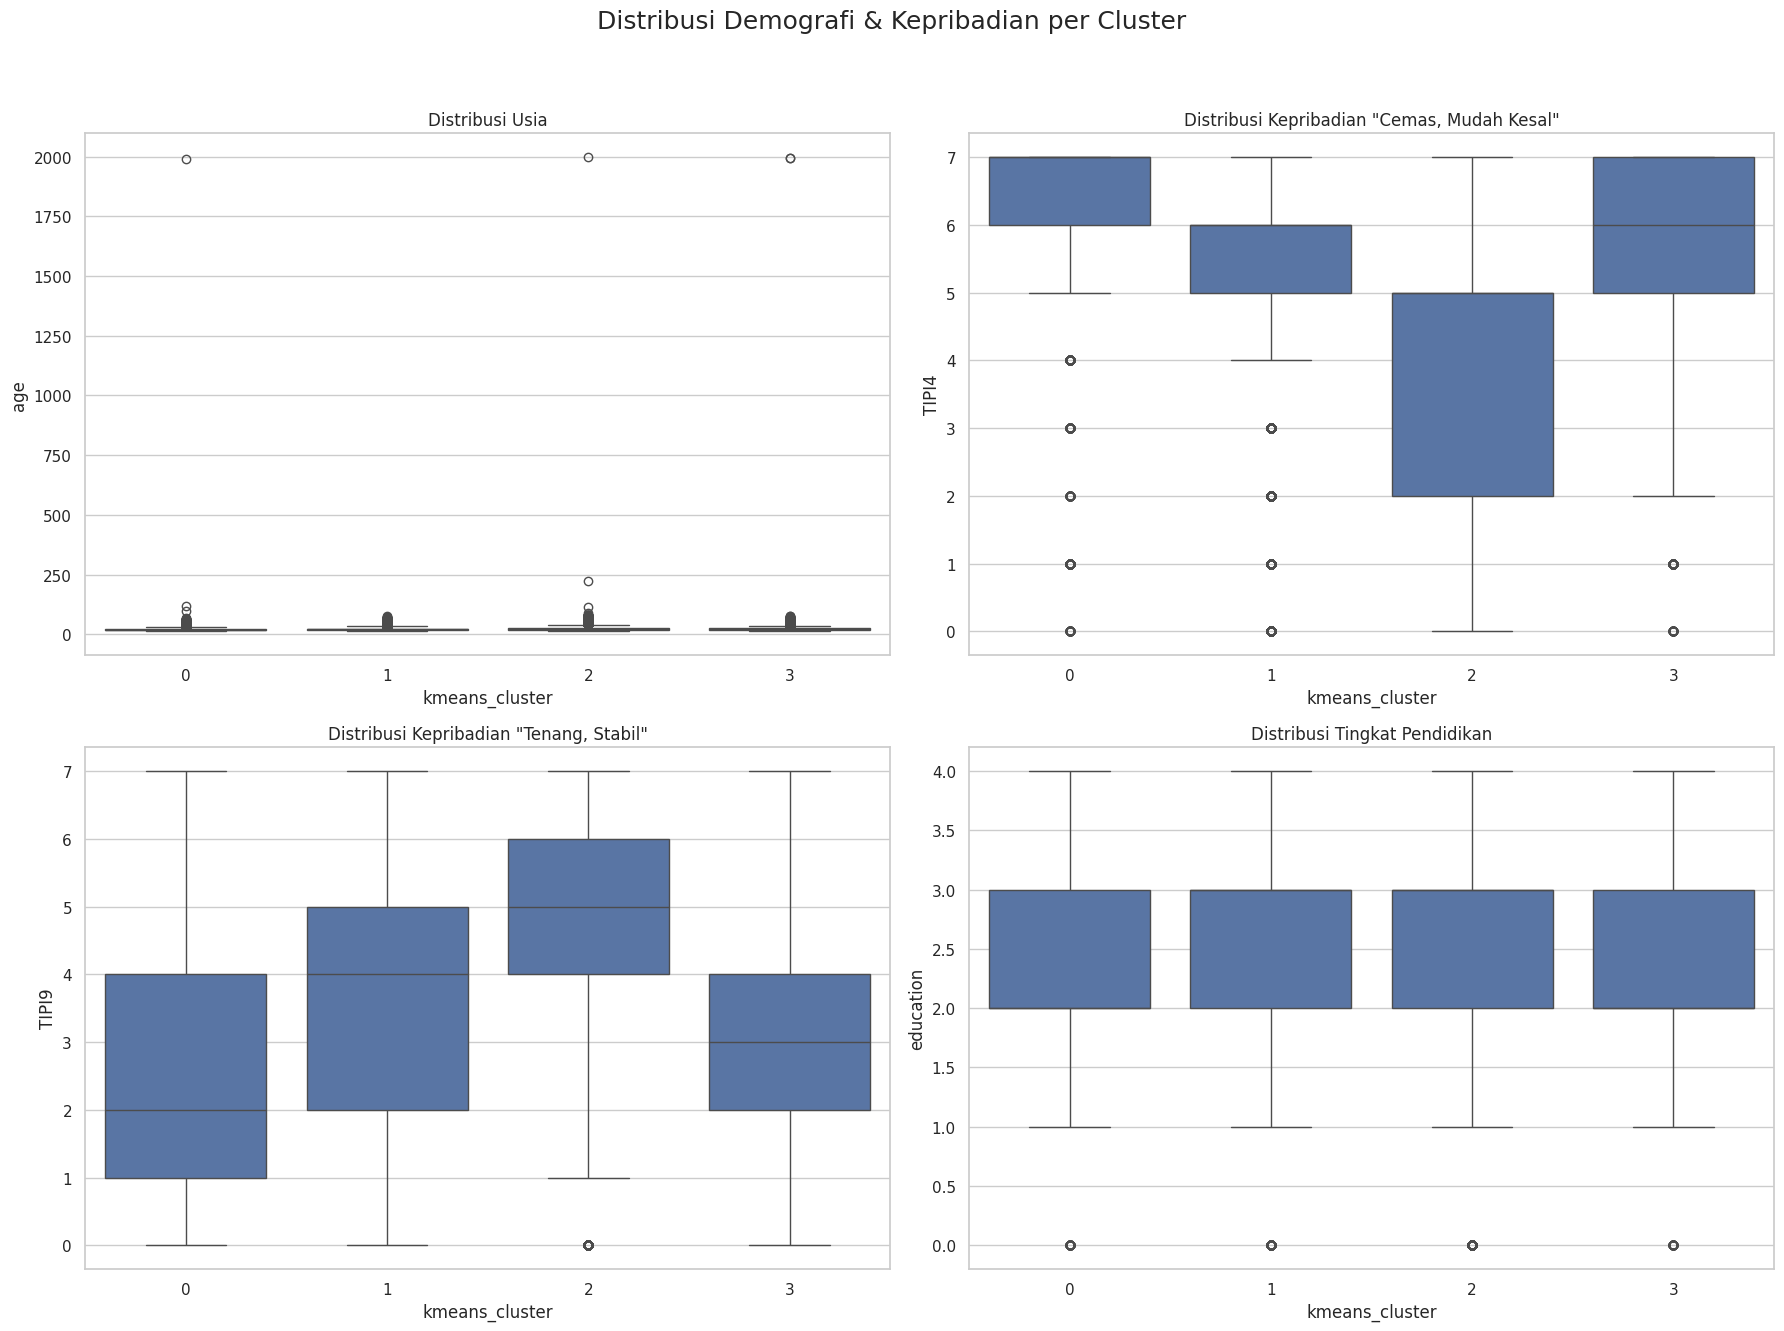

In [ ]:
# Analisis Fitur Numerik (Usia & Skor TIPI)
print("\nProfil Rata-rata Fitur Numerik (Usia & TIPI) per Cluster:")
# Use the list of column names for grouping and aggregation
numerical_profiles = df_bersih.groupby('kmeans_cluster')[profiling_columns].mean()
display(numerical_profiles)

# Visualisasi distribusi Usia dan beberapa skor TIPI dengan Box Plot
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Distribusi Demografi & Kepribadian per Cluster', fontsize=18)

# Contoh 1: Usia
sns.boxplot(x='kmeans_cluster', y='age', data=df_bersih, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Usia')

# Contoh 2: TIPI4 (Anxious, easily upset - Cemas, mudah kesal)
sns.boxplot(x='kmeans_cluster', y='TIPI4', data=df_bersih, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Kepribadian "Cemas, Mudah Kesal"')

# Contoh 3: TIPI9 (Calm, emotionally stable - Tenang, stabil secara emosi)
sns.boxplot(x='kmeans_cluster', y='TIPI9', data=df_bersih, ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Kepribadian "Tenang, Stabil"')

# Contoh 4: education (1=Less HS, 2=HS, 3=Univ, 4=Graduate)
sns.boxplot(x='kmeans_cluster', y='education', data=df_bersih, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Tingkat Pendidikan')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

 Distribusi Persentase Fitur Kategorikal per Cluster:

Distribusi untuk 'education':


education         0.0     1.0     2.0     3.0     4.0
kmeans_cluster                                       
0               1.30%  14.49%  43.11%  32.65%   8.45%
1               1.18%   9.65%  38.12%  39.60%  11.44%
2               1.25%   6.01%  32.07%  43.42%  17.25%
3               1.22%  11.48%  40.63%  35.49%  11.19%

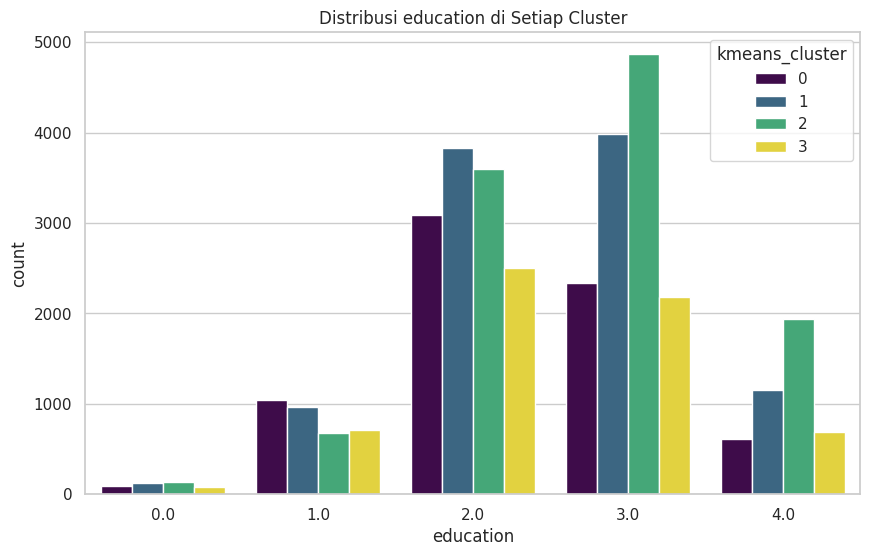


Distribusi untuk 'urban':


urban             0.0     1.0     2.0     3.0
kmeans_cluster                               
0               1.34%  21.28%  28.65%  48.73%
1               0.96%  19.91%  34.25%  44.88%
2               0.83%  22.03%  33.54%  43.60%
3               0.94%  20.40%  33.51%  45.15%

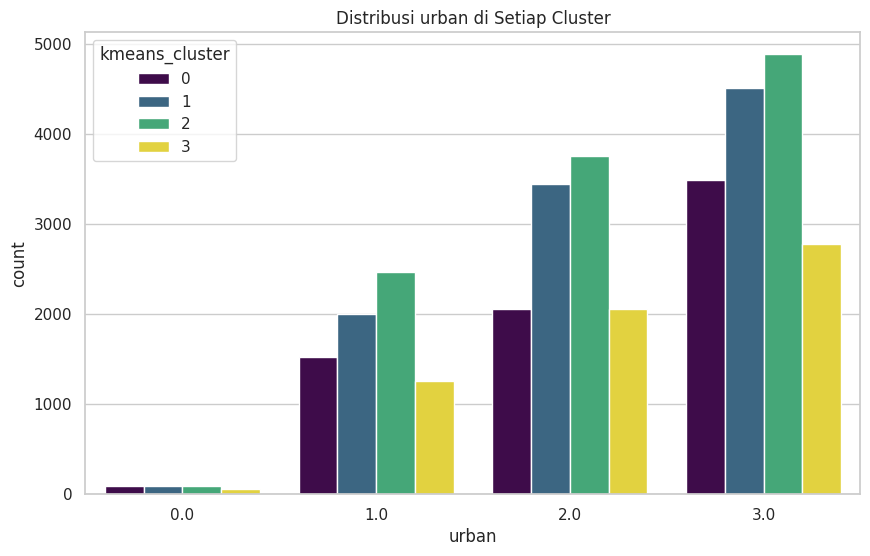


Distribusi untuk 'gender':


gender            0.0     1.0     2.0    3.0
kmeans_cluster                              
0               0.18%  14.09%  83.57%  2.16%
1               0.17%  20.03%  78.59%  1.21%
2               0.18%  26.41%  72.89%  0.52%
3               0.20%  23.02%  75.06%  1.72%

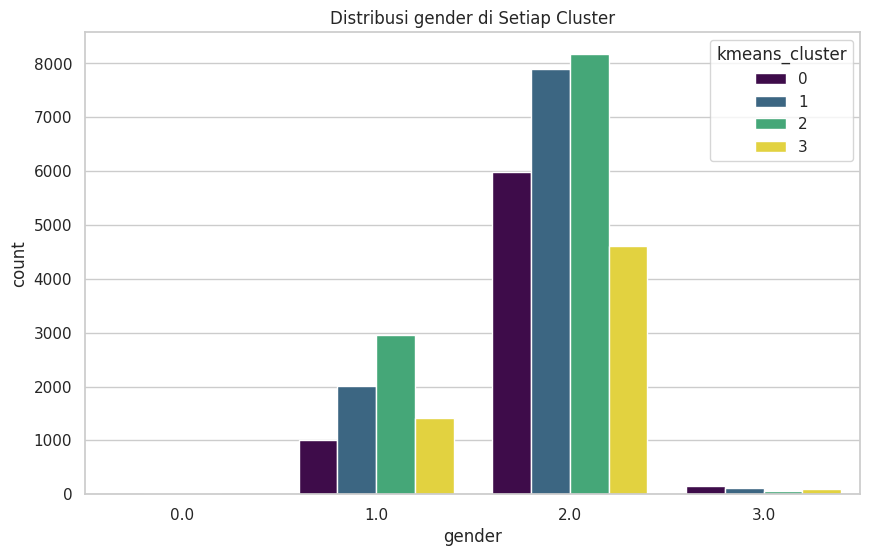


Distribusi untuk 'age':


age            13.0   14.0   15.0   16.0   17.0   18.0   19.0    20.0    \
kmeans_cluster                                                            
0               2.36%  4.28%  5.61%  7.49%  7.62%  9.09%  8.91%  10.35%   
1               1.02%  1.88%  3.20%  5.19%  6.13%  7.66%  9.84%  10.18%   
2               0.54%  0.94%  2.07%  3.35%  3.93%  6.60%  8.34%   9.18%   
3               1.32%  2.41%  3.82%  5.95%  5.63%  7.56%  8.75%  10.08%   

age            21.0   22.0    ... 82.0   89.0   99.0   115.0  117.0  223.0   \
kmeans_cluster                ...                                             
0               8.72%  7.25%  ...  0.00%  0.00%  0.01%  0.00%  0.01%  0.00%   
1               9.69%  8.47%  ...  0.00%  0.00%  0.00%  0.00%  0.00%  0.00%   
2               9.14%  7.71%  ...  0.01%  0.01%  0.00%  0.01%  0.00%  0.01%   
3               8.68%  7.61%  ...  0.00%  0.00%  0.00%  0.00%  0.00%  0.00%   

age            1991.0 1993.0 1996.0 1998.0  
kmeans_cluster                              
0               0.01%  0.00%  0.00%  0.00%  
1               0.00%  0.00%  0.00%  0.00%  
2               0.00%  0.00%  0.00%  0.01%  
3               0.00%  0.02%  0.02%  0.00%  

[4 rows x 78 columns]

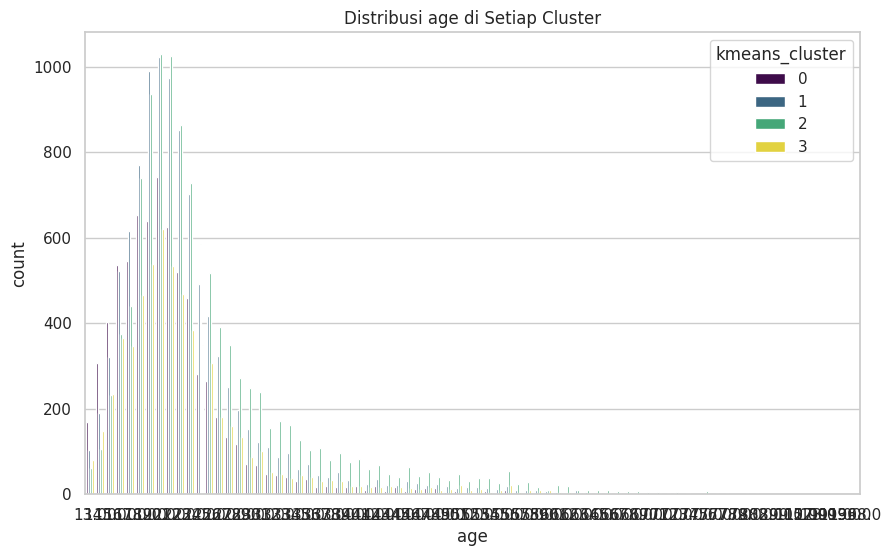


Distribusi untuk 'hand':


hand              0.0     1.0     2.0    3.0
kmeans_cluster                              
0               0.43%  86.28%  11.06%  2.23%
1               0.35%  88.02%  10.36%  1.27%
2               0.51%  88.19%  10.30%  1.00%
3               0.44%  88.28%  10.18%  1.11%

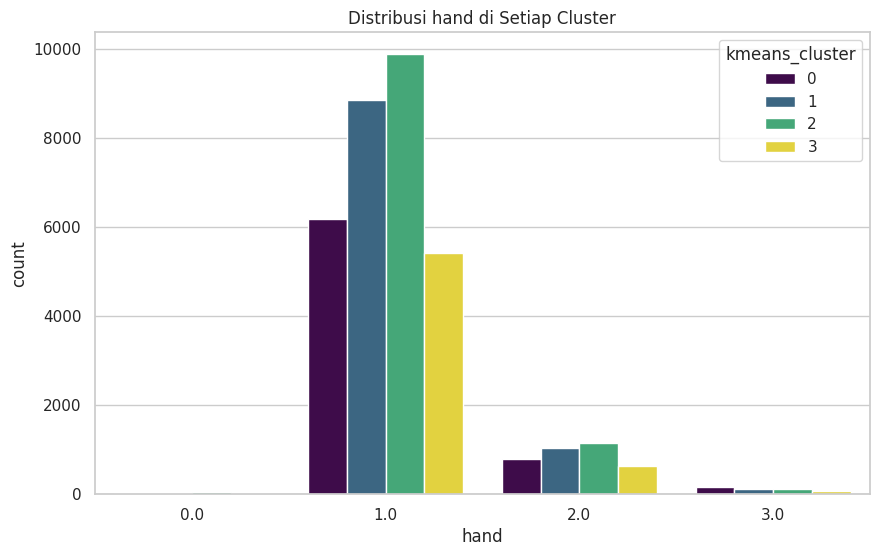


Distribusi untuk 'religion':


religion         0.0    1.0     2.0    3.0    4.0    5.0    6.0    7.0   \
kmeans_cluster                                                            
0               1.05%  6.26%   8.97%  0.96%  7.85%  0.36%  2.41%  5.36%   
1               0.97%  7.68%   8.04%  1.25%  7.69%  0.21%  3.61%  5.63%   
2               0.65%  6.32%   7.92%  1.57%  6.99%  0.19%  4.45%  5.08%   
3               1.01%  9.61%  11.84%  1.27%  8.13%  0.34%  3.63%  5.25%   

religion         8.0    9.0     10.0   11.0   12.0  
kmeans_cluster                                      
0               1.42%  0.22%  59.47%  0.20%  5.47%  
1               1.46%  0.38%  58.93%  0.16%  3.98%  
2               2.17%  0.31%  60.76%  0.12%  3.46%  
3               1.95%  0.34%  52.35%  0.08%  4.21%

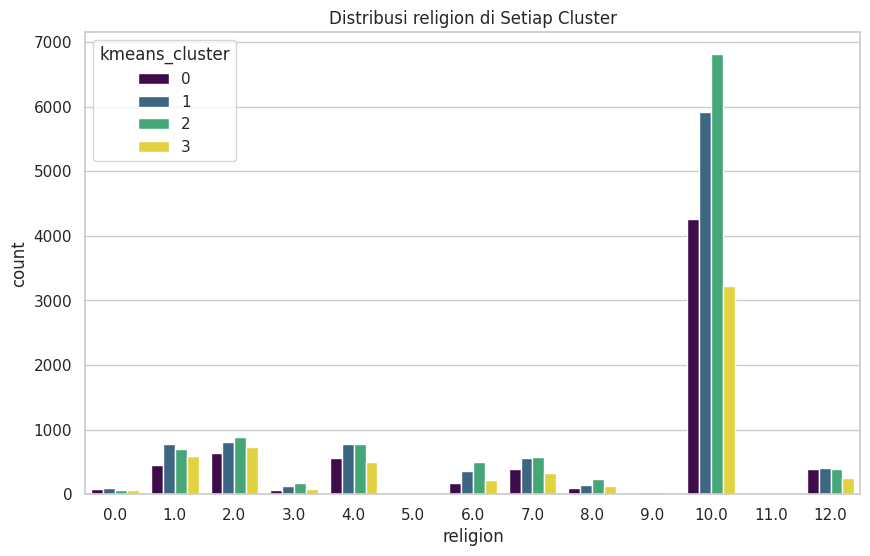


Distribusi untuk 'orientation':


orientation       0.0     1.0     2.0    3.0    4.0     5.0
kmeans_cluster                                             
0               8.74%  51.56%  16.21%  5.41%  5.90%  12.18%
1               9.15%  61.69%  11.65%  4.45%  4.65%   8.42%
2               7.83%  67.28%   8.15%  4.17%  4.75%   7.81%
3               7.36%  60.67%  14.23%  5.27%  4.86%   7.61%

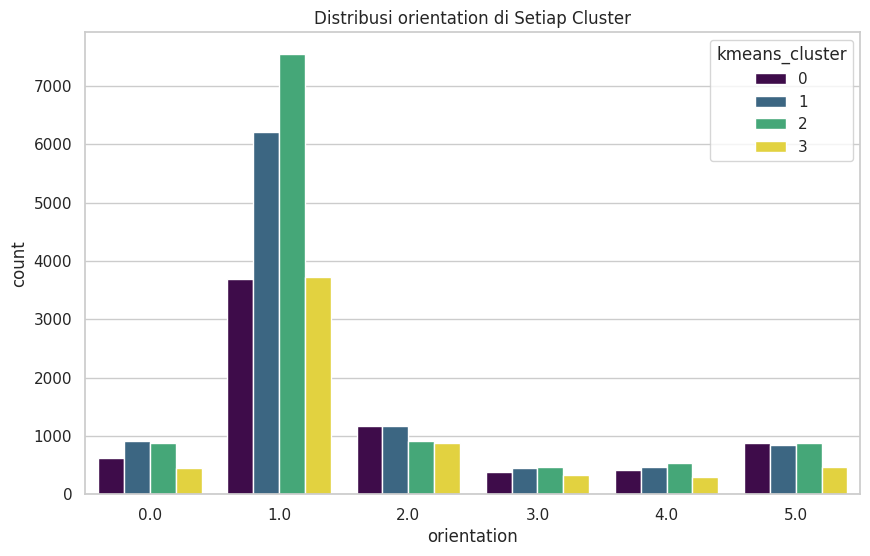


Distribusi untuk 'race':


race              10.0   20.0   30.0   40.0   50.0    60.0    70.0
kmeans_cluster                                                    
0               60.81%  1.06%  1.32%  0.08%  0.71%  22.87%  13.14%
1               61.23%  0.72%  1.16%  0.03%  0.58%  24.87%  11.41%
2               62.84%  0.69%  1.48%  0.03%  0.25%  22.23%  12.49%
3               56.33%  0.98%  1.54%  0.02%  0.50%  28.66%  11.97%

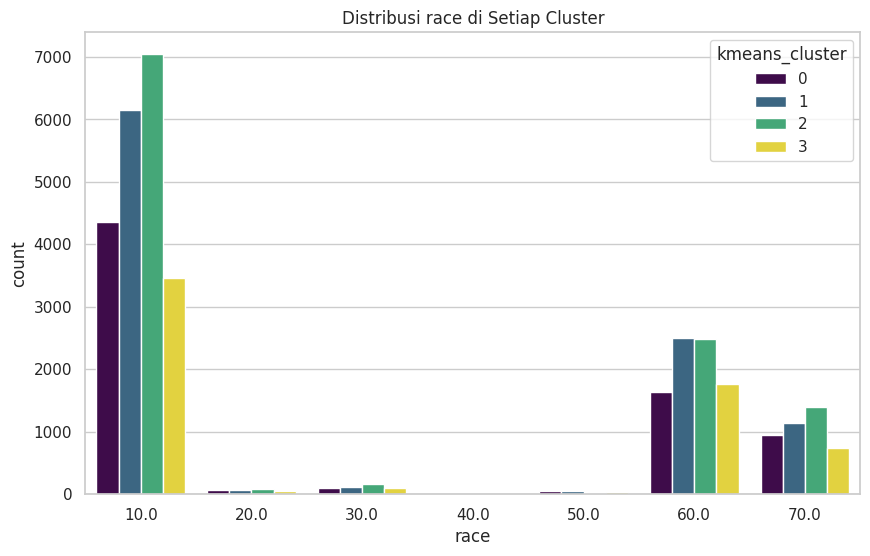


Distribusi untuk 'voted':


voted             0.0     1.0     2.0
kmeans_cluster                       
0               0.99%  18.61%  80.40%
1               0.90%  26.28%  72.82%
2               0.78%  33.70%  65.52%
3               0.70%  25.67%  73.63%

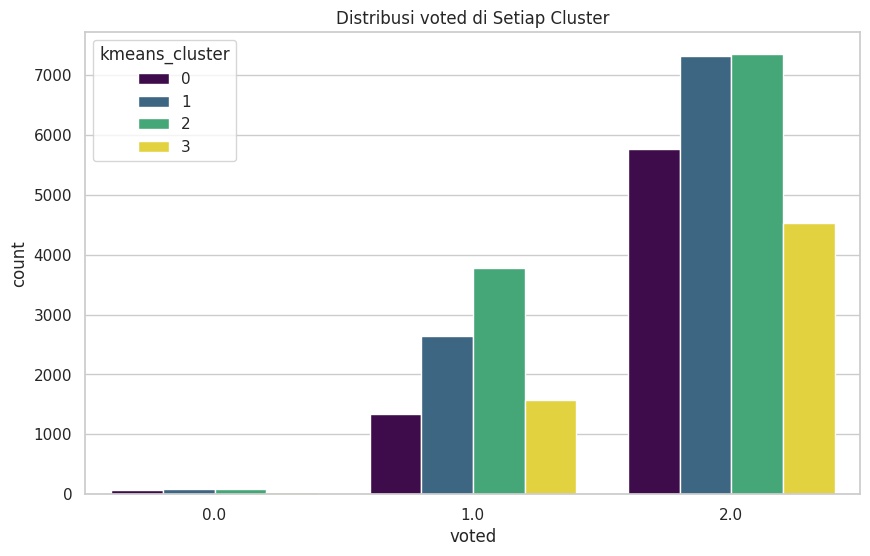


Distribusi untuk 'married':


married           0.0     1.0     2.0    3.0
kmeans_cluster                              
0               0.59%  91.72%   5.79%  1.91%
1               0.51%  87.22%   9.88%  2.40%
2               0.42%  80.18%  16.38%  3.02%
3               0.68%  89.42%   7.58%  2.32%

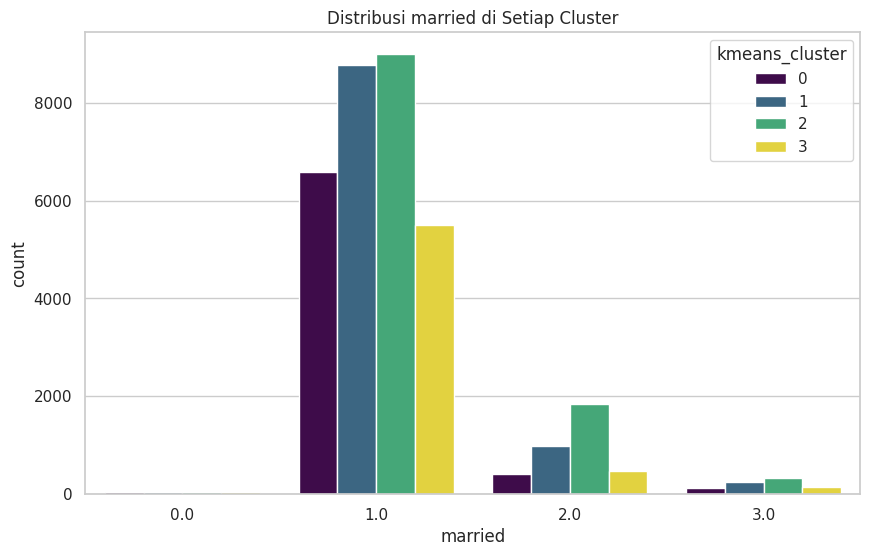


Distribusi untuk 'familysize':


familysize      0.0    1.0     2.0     3.0     4.0     5.0    6.0    7.0    \
kmeans_cluster                                                               
0               3.19%  7.14%  20.49%  23.07%  19.96%  12.93%  6.46%  3.22%   
1               2.60%  7.16%  22.86%  23.35%  18.90%  12.45%  5.97%  3.07%   
2               2.59%  6.30%  20.63%  22.44%  19.63%  13.40%  7.08%  3.61%   
3               2.81%  7.80%  24.29%  23.39%  18.76%  11.46%  5.84%  2.78%   

familysize      8.0    9.0    ...  13.0   14.0   15.0   16.0   17.0   19.0   \
kmeans_cluster                ...                                             
0               1.76%  0.77%  ...  0.04%  0.01%  0.03%  0.01%  0.00%  0.00%   
1               1.66%  0.95%  ...  0.03%  0.01%  0.00%  0.01%  0.01%  0.01%   
2               2.02%  1.05%  ...  0.04%  0.04%  0.01%  0.02%  0.00%  0.00%   
3               1.59%  0.62%  ...  0.05%  0.00%  0.03%  0.00%  0.00%  0.00%   

familysize      21.0   54.0   99.0   133.0  
kmeans_cluster                              
0               0.01%  0.01%  0.01%  0.01%  
1               0.00%  0.00%  0.00%  0.00%  
2               0.00%  0.00%  0.00%  0.00%  
3               0.00%  0.00%  0.00%  0.00%  

[4 rows x 23 columns]

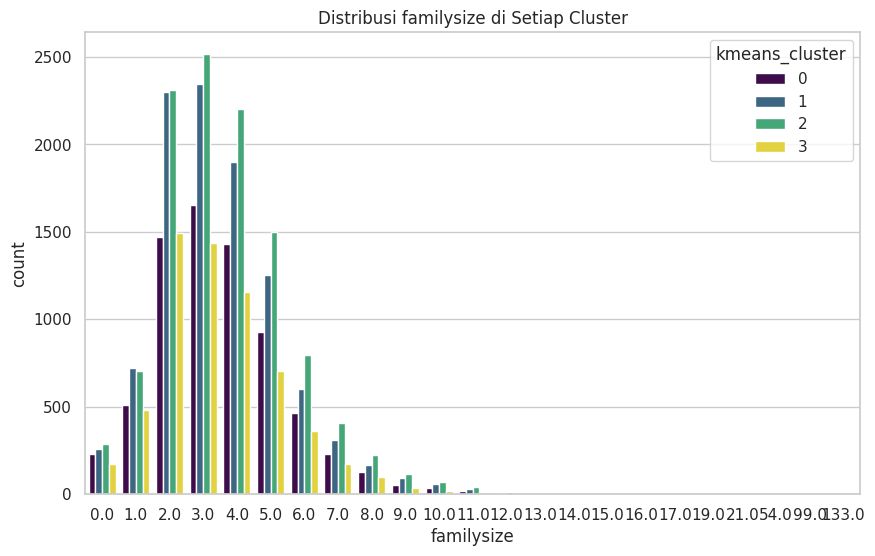


Distribusi untuk 'TIPI1':


TIPI1             0.0     1.0     2.0     3.0     4.0     5.0     6.0    7.0
kmeans_cluster                                                              
0               1.37%  21.67%  14.11%  10.92%  16.53%  18.12%  11.39%  5.89%
1               1.31%  11.61%  14.13%  13.28%  16.21%  24.11%  14.64%  4.71%
2               1.42%   9.53%  11.03%  10.34%  14.29%  23.52%  21.48%  8.39%
3               1.04%  23.77%  18.45%  12.44%  14.29%  17.12%   9.40%  3.50%

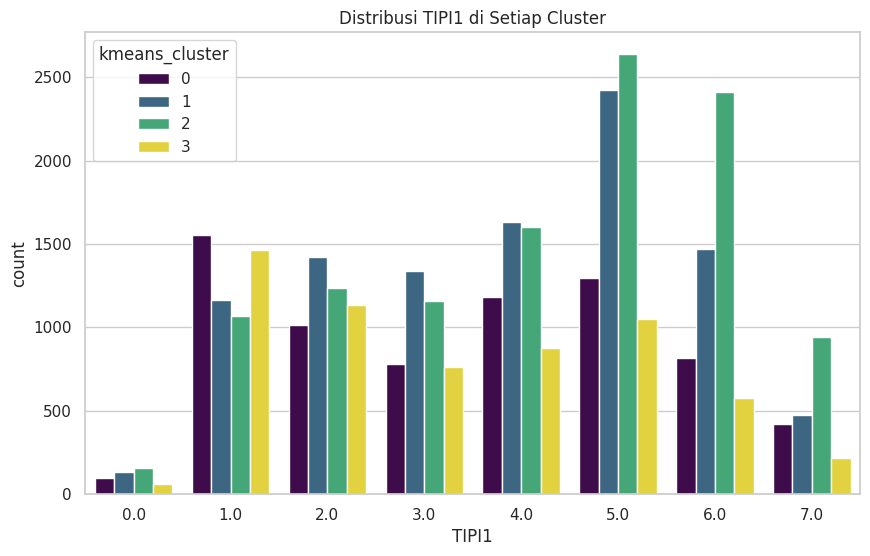


Distribusi untuk 'TIPI2':


TIPI2             0.0     1.0     2.0     3.0     4.0     5.0     6.0     7.0
kmeans_cluster                                                               
0               1.79%   6.40%   7.02%   8.27%  15.82%  24.45%  21.03%  15.23%
1               1.52%   7.77%   9.85%  12.13%  15.83%  28.08%  18.51%   6.31%
2               1.56%  14.95%  12.83%  12.18%  15.83%  25.46%  13.22%   3.98%
3               1.32%   8.75%   9.12%   9.56%  15.92%  25.75%  19.96%   9.62%

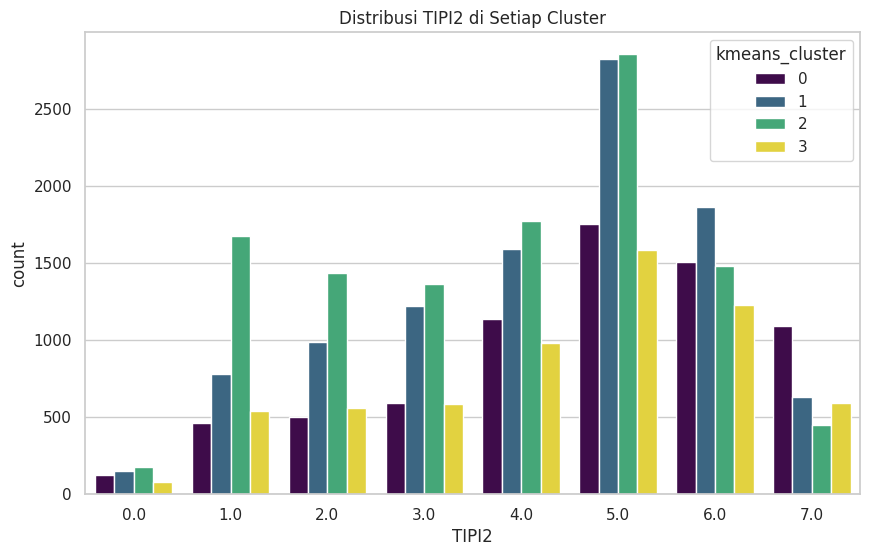


Distribusi untuk 'TIPI3':


TIPI3             0.0    1.0     2.0     3.0     4.0     5.0     6.0     7.0
kmeans_cluster                                                              
0               1.72%  9.94%   9.15%  11.56%  12.85%  20.89%  19.68%  14.21%
1               1.66%  3.93%   7.34%  10.51%  12.24%  25.04%  25.78%  13.51%
2               1.55%  2.45%   4.21%   7.94%   8.97%  23.36%  32.18%  19.33%
3               1.20%  8.86%  10.36%  11.93%  12.57%  22.66%  20.55%  11.87%

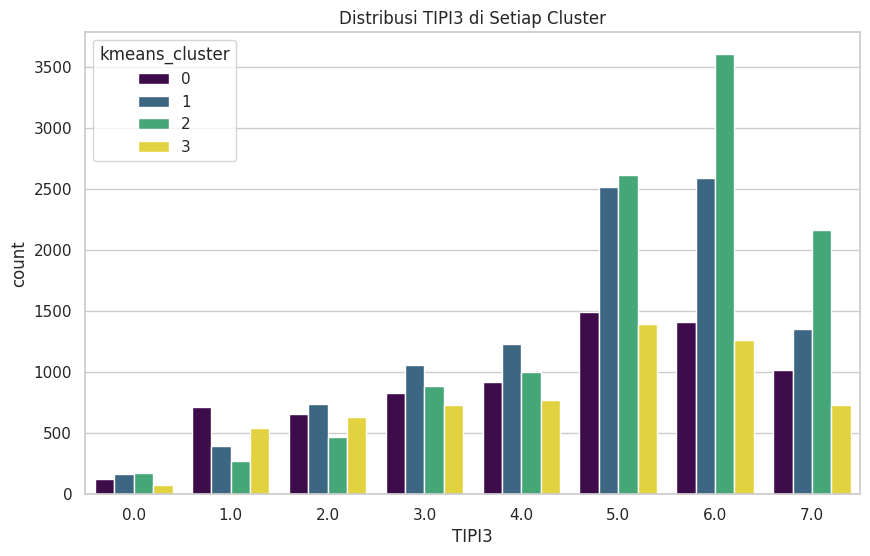


Distribusi untuk 'TIPI4':


TIPI4             0.0     1.0     2.0     3.0     4.0     5.0     6.0     7.0
kmeans_cluster                                                               
0               0.96%   1.70%   1.03%   1.38%   1.60%   7.60%  22.43%  63.29%
1               1.30%   1.63%   3.51%   4.79%   6.31%  25.73%  32.54%  24.19%
2               1.51%  11.55%  13.26%  11.71%  11.93%  29.81%  14.64%   5.58%
3               0.96%   1.93%   2.88%   3.63%   4.55%  18.57%  30.14%  37.34%

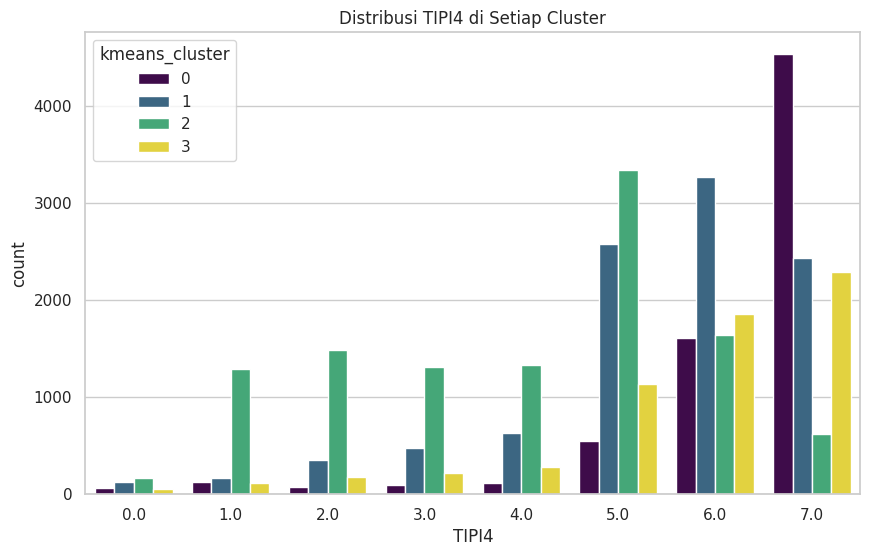


Distribusi untuk 'TIPI5':


TIPI5             0.0    1.0    2.0     3.0     4.0     5.0     6.0     7.0
kmeans_cluster                                                             
0               1.60%  8.90%  8.72%  10.45%  16.33%  22.66%  17.18%  14.16%
1               1.39%  2.38%  5.30%   9.00%  13.58%  26.05%  24.60%  17.69%
2               1.39%  1.66%  2.57%   5.61%   9.67%  24.32%  30.57%  24.21%
3               1.17%  6.08%  7.98%  10.47%  14.94%  23.46%  21.05%  14.84%

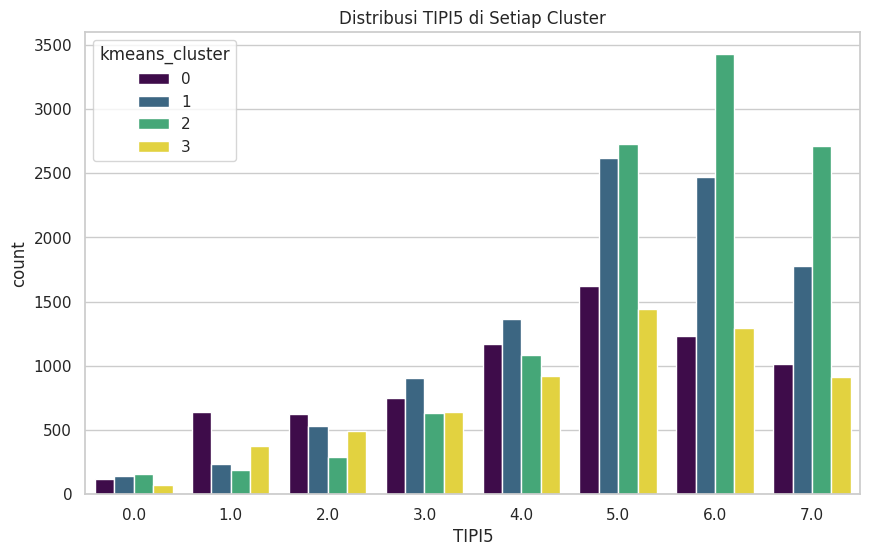


Distribusi untuk 'TIPI6':


TIPI6             0.0    1.0    2.0     3.0     4.0     5.0     6.0     7.0
kmeans_cluster                                                             
0               1.35%  4.92%  4.50%   7.32%  11.79%  15.94%  19.90%  34.27%
1               1.31%  5.64%  6.98%   9.36%  13.10%  20.26%  21.79%  21.55%
2               1.42%  9.73%  8.98%  10.25%  13.22%  22.29%  19.22%  14.88%
3               1.06%  4.62%  4.81%   6.71%  11.69%  16.86%  21.61%  32.65%

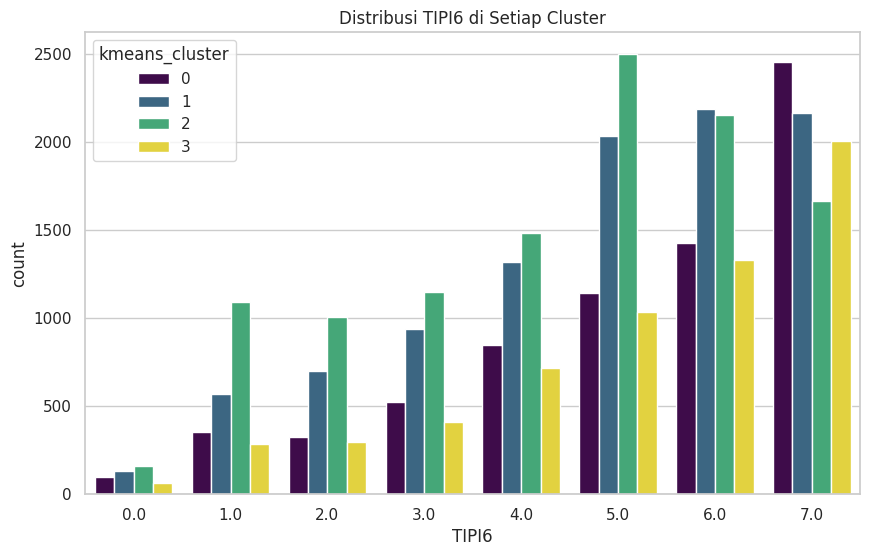


Distribusi untuk 'TIPI7':


TIPI7             0.0    1.0    2.0    3.0     4.0     5.0     6.0     7.0
kmeans_cluster                                                            
0               1.79%  3.42%  3.53%  5.16%  12.57%  20.85%  23.93%  28.76%
1               1.59%  1.46%  2.80%  6.09%  10.73%  24.15%  29.08%  24.09%
2               1.64%  2.02%  2.83%  4.85%  10.01%  24.12%  30.67%  23.86%
3               1.45%  2.96%  4.55%  6.47%  12.60%  21.61%  26.82%  23.54%

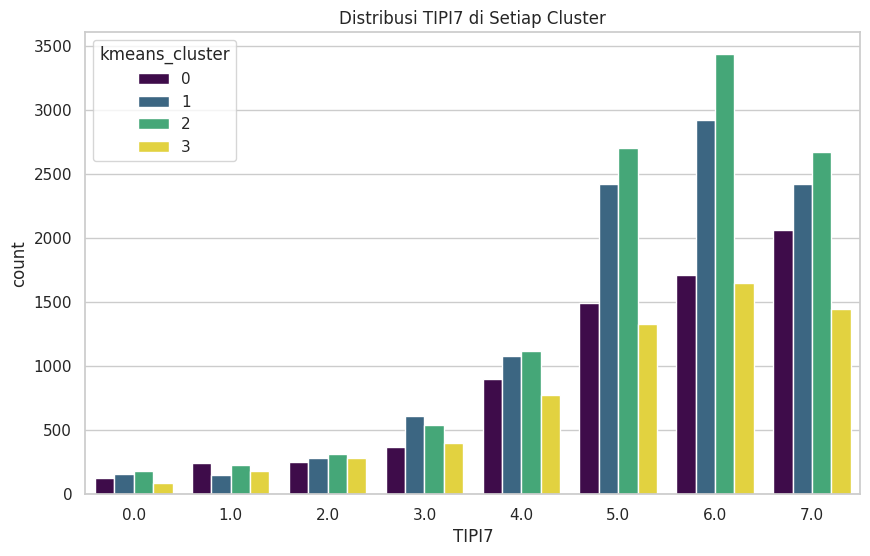


Distribusi untuk 'TIPI8':


TIPI8             0.0     1.0     2.0     3.0     4.0     5.0     6.0     7.0
kmeans_cluster                                                               
0               1.79%   7.13%   7.28%   8.30%  10.17%  19.53%  18.41%  27.41%
1               1.94%   8.87%  10.77%  11.58%  12.27%  24.86%  17.47%  12.24%
2               1.82%  13.73%  15.10%  13.50%  12.68%  25.48%  11.80%   5.90%
3               1.41%   8.42%   8.67%   9.62%  10.50%  22.26%  18.92%  20.19%

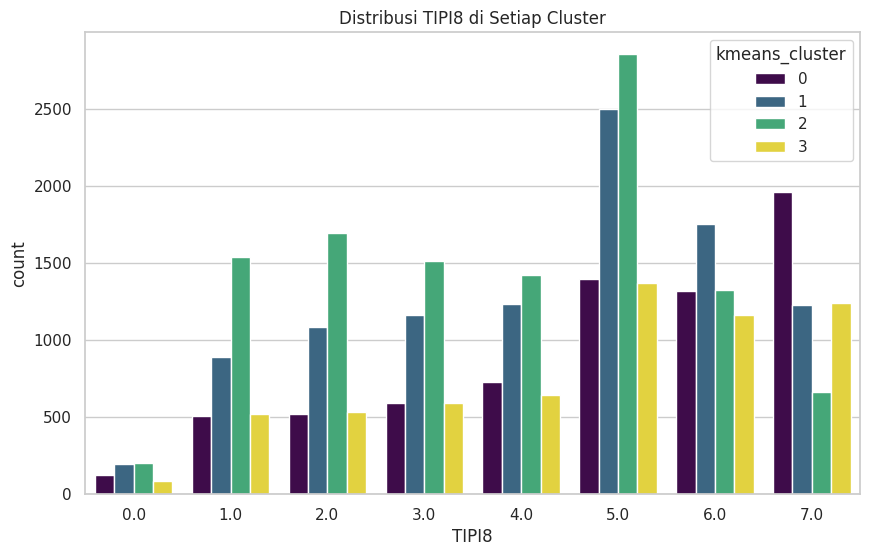


Distribusi untuk 'TIPI9':


TIPI9             0.0     1.0     2.0     3.0     4.0     5.0     6.0     7.0
kmeans_cluster                                                               
0               1.12%  31.63%  24.04%  15.44%  13.78%   7.88%   3.60%   2.51%
1               1.23%   8.06%  17.62%  22.67%  21.56%  16.20%   9.19%   3.47%
2               1.20%   1.95%   5.19%  12.77%  17.13%  23.76%  24.77%  13.21%
3               0.94%  21.96%  24.37%  18.70%  15.64%  10.36%   5.25%   2.78%

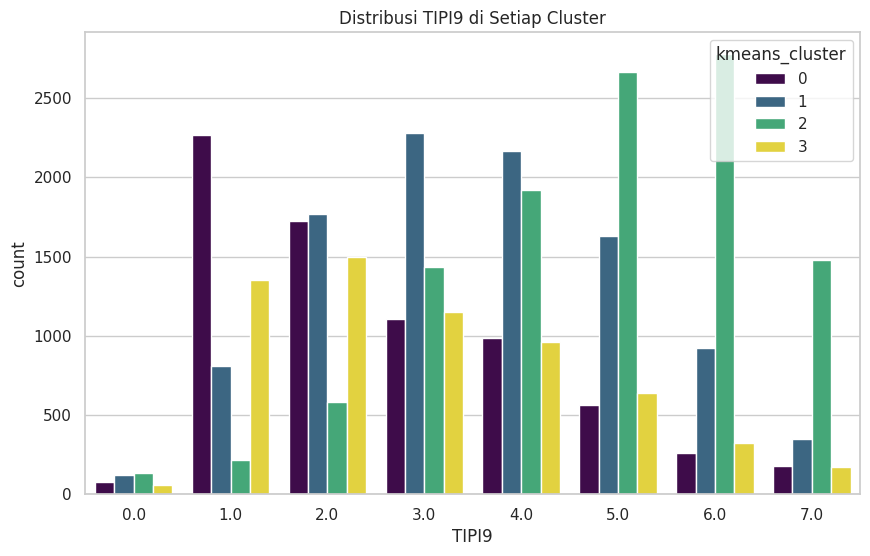


Distribusi untuk 'TIPI10':


TIPI10            0.0     1.0     2.0     3.0     4.0     5.0     6.0     7.0
kmeans_cluster                                                               
0               1.66%  12.08%  10.85%  13.07%  20.40%  15.15%  11.70%  15.09%
1               1.47%  11.37%  14.12%  15.92%  20.55%  17.94%  11.02%   7.61%
2               1.51%  13.63%  16.26%  17.21%  19.14%  18.08%   9.10%   5.07%
3               1.32%  11.41%  13.46%  14.36%  18.79%  16.76%  12.42%  11.48%

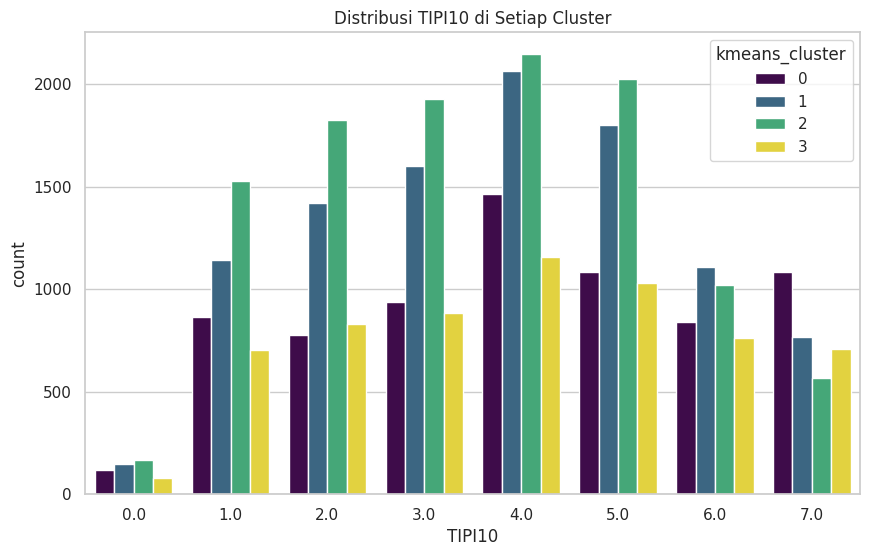

In [ ]:
print(" Distribusi Persentase Fitur Kategorikal per Cluster:")
for col in profiling_cols:
    # Menggunakan crosstab untuk melihat distribusi dalam persentase
    crosstab_norm = pd.crosstab(index=df_bersih['kmeans_cluster'],
                                columns=df_bersih[col],
                                normalize="index")
    print(f"\nDistribusi untuk '{col}':")
    display(crosstab_norm.map('{:.2%}'.format))

    # Visualisasi dengan Count Plot
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='kmeans_cluster', data=df_bersih, palette='viridis')
    plt.title(f'Distribusi {col} di Setiap Cluster')
    plt.show()

GMM

In [ ]:
# Menghitung skor rata-rata per skala untuk setiap cluster
cluster_profiles_agg = pd.DataFrame({
    'Depression': df_visualisasi.groupby('gmm_cluster')[depression_cols].mean().mean(axis=1),
    'Anxiety': df_visualisasi.groupby('gmm_cluster')[anxiety_cols].mean().mean(axis=1),
    'Stress': df_visualisasi.groupby('gmm_cluster')[stress_cols].mean().mean(axis=1)
})

print("\nProfil Rata-rata per Skala untuk Setiap Cluster:")
display(cluster_profiles_agg)


Profil Rata-rata per Skala untuk Setiap Cluster:


Depression   Anxiety    Stress
gmm_cluster                                
0              0.258015  0.433999  0.339499
1             -0.263641 -0.053956 -0.198280
2              0.269607  0.124750  0.121886
3             -0.185226 -0.265505 -0.167809

<ipython-input-50-ea8f8f15d9d3>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row.tolist() + [row[0]]


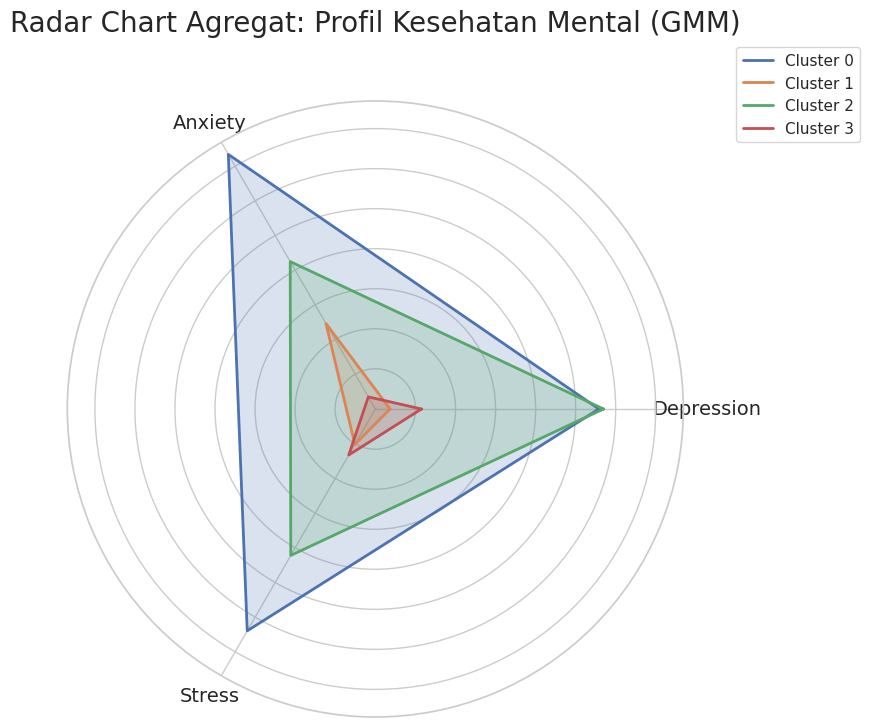

In [ ]:
labels = cluster_profiles_agg.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + [0]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, row in cluster_profiles_agg.iterrows():
    values = row.tolist() + [row[0]]
    ax.plot(angles, values, label=f'Cluster {i}', linewidth=2)
    ax.fill(angles, values, alpha=0.2)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, size=14)
plt.title('Radar Chart Agregat: Profil Kesehatan Mental (GMM)', size=20, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


--- Analisis Profil Cluster GMM (APA karakteristik stresnya?) ---
Profil Rata-rata (Centroid) untuk Setiap Cluster GMM:


Q1A       Q6A       Q8A      Q11A      Q12A      Q14A  \
gmm_cluster                                                               
0            0.347647  0.317506  0.364826  0.375388  0.393426  0.292971   
1           -0.251725 -0.190808 -0.219539 -0.352082 -0.161586 -0.182625   
2            0.124905  0.094532  0.156286  0.086653  0.097177  0.061772   
3           -0.152520 -0.141578 -0.201679 -0.136562 -0.198117 -0.122970   

                 Q18A      Q22A      Q27A      Q29A      Q32A      Q33A  \
gmm_cluster                                                               
0            0.305380  0.337440  0.331983  0.373178  0.321760  0.389538   
1           -0.133596 -0.121110 -0.291429 -0.266259 -0.184120 -0.154058   
2            0.064519  0.190868  0.144606  0.099660  0.134416  0.113153   
3           -0.131788 -0.204131 -0.157367 -0.163307 -0.171315 -0.215597   

                 Q35A      Q39A  
gmm_cluster                      
0            0.292912  0.309036  
1           -0.092446 -0.174533  
2            0.160934  0.176920  
3           -0.174125 -0.178264

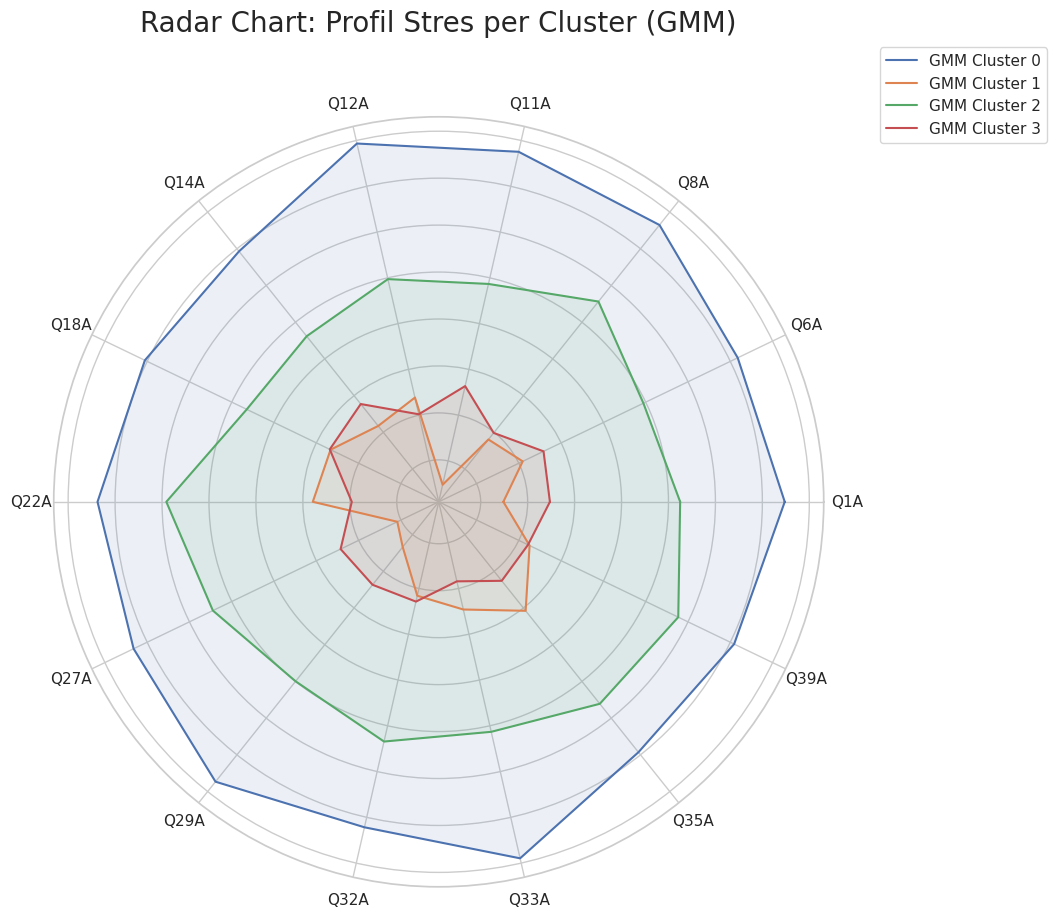

In [ ]:
print("\n--- Analisis Profil Cluster GMM (APA karakteristik stresnya?) ---")
# Menghitung nilai rata-rata (centroid) untuk setiap cluster GMM
gmm_cluster_profiles = df_visualisasi.groupby('gmm_cluster')[stress_cols].mean()

print("Profil Rata-rata (Centroid) untuk Setiap Cluster GMM:")
display(gmm_cluster_profiles)

# Visualisasi Profil GMM dengan Radar Chart
labels = stress_cols
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for i, row in gmm_cluster_profiles.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'GMM Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Radar Chart: Profil Stres per Cluster (GMM)', size=20, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


--- Analisis Profil Demografi & Kepribadian GMM (SIAPA orangnya?) ---


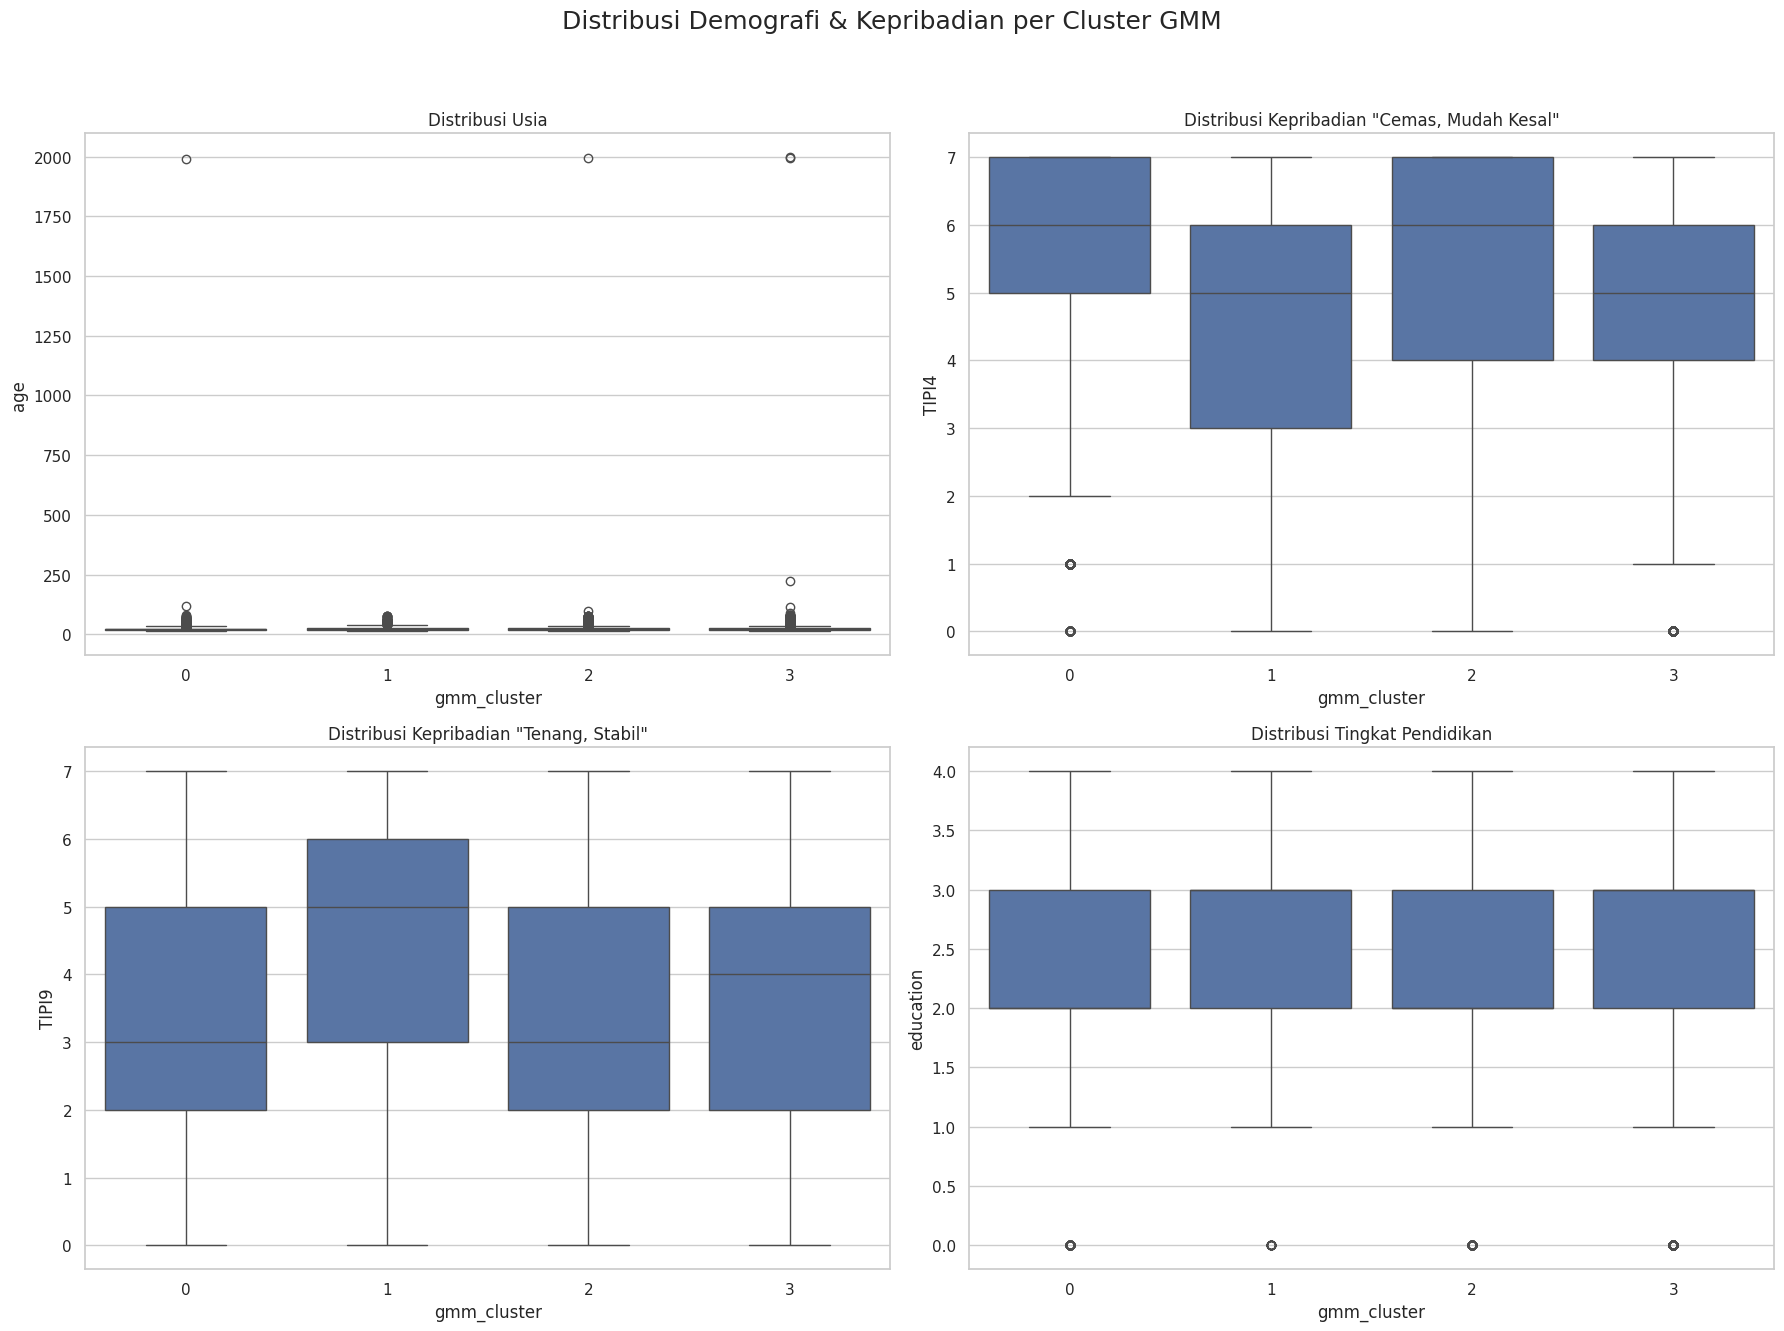

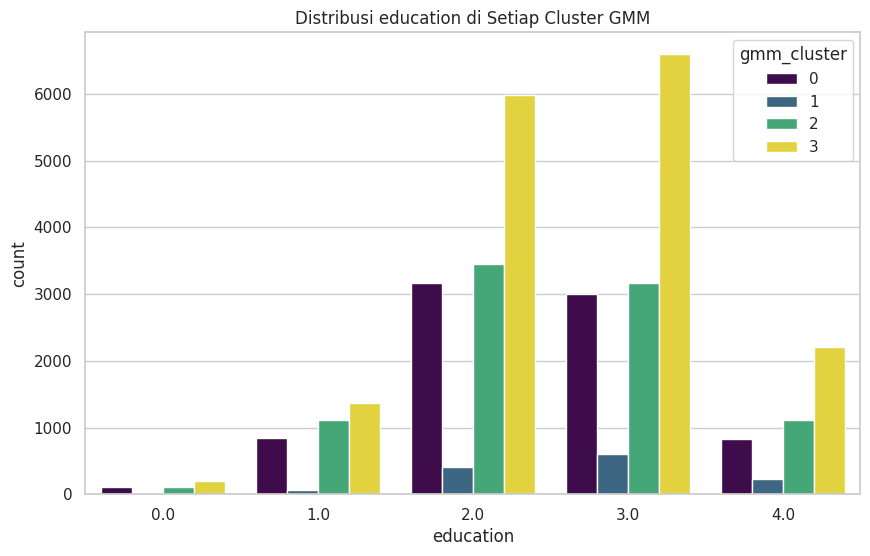

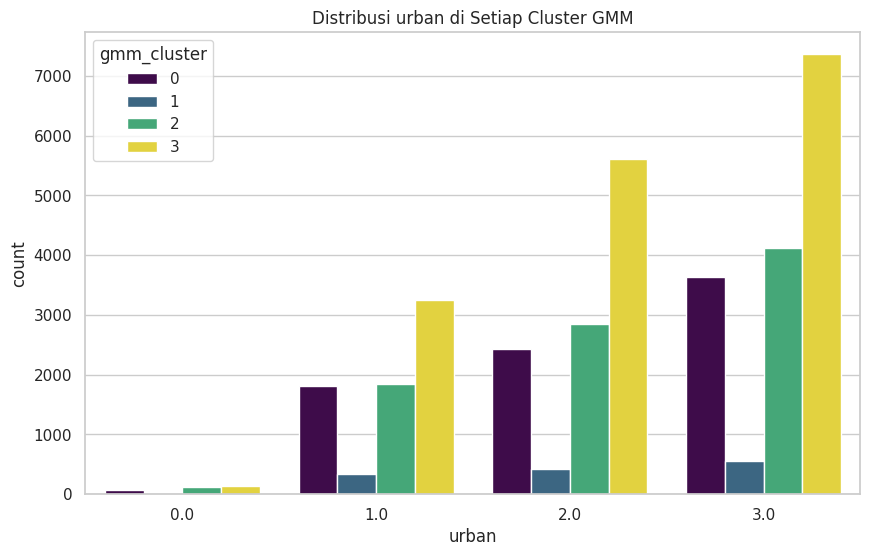

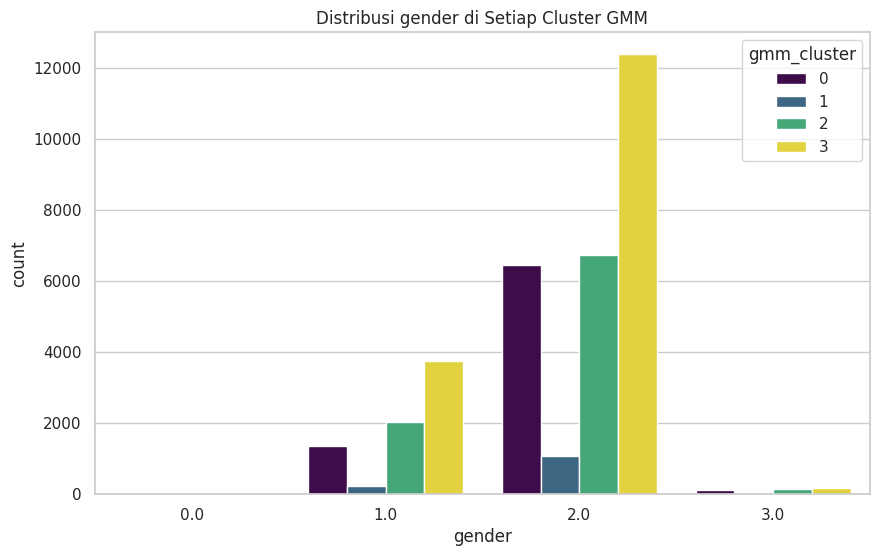

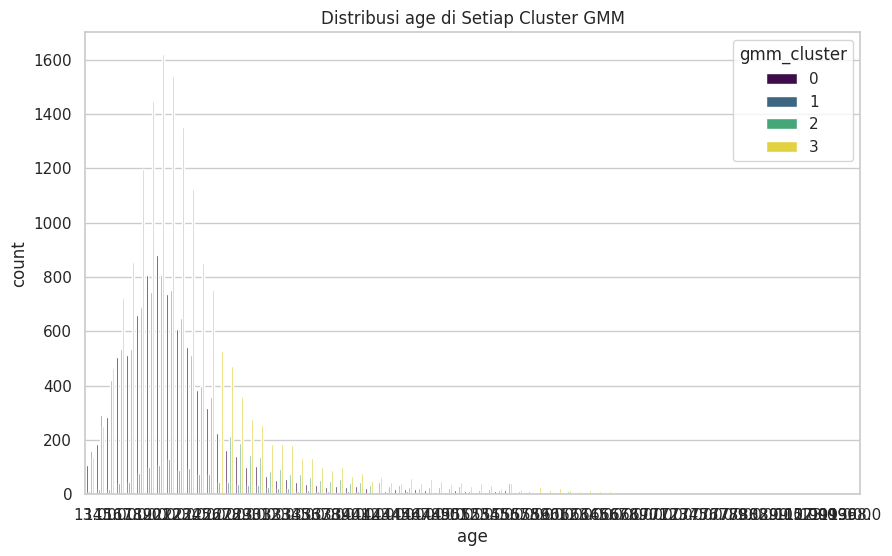

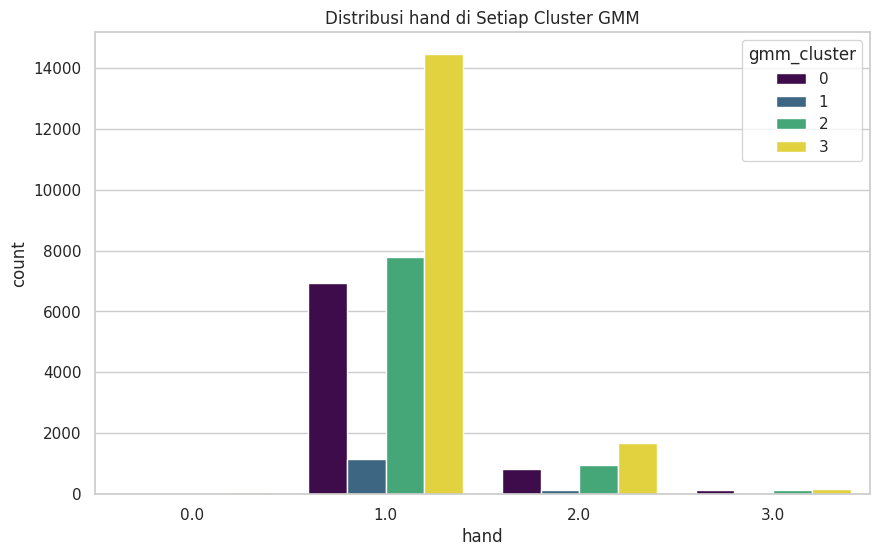

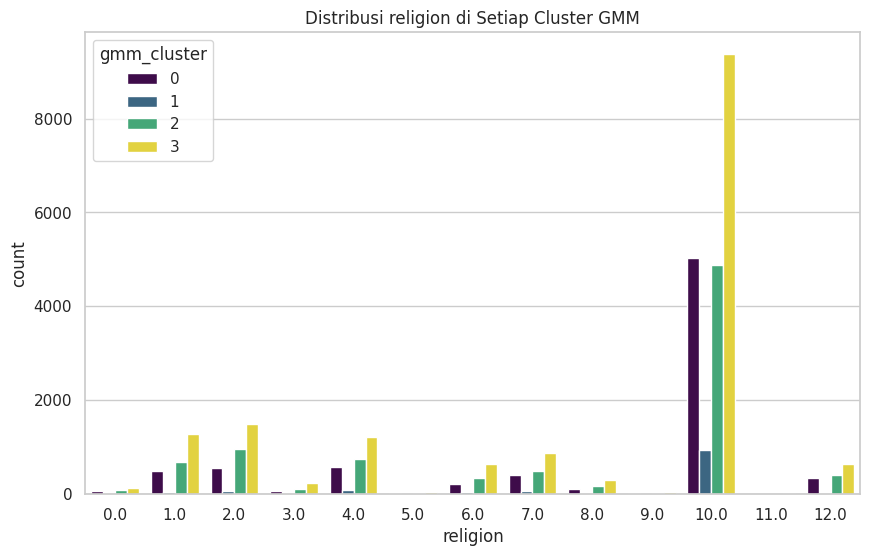

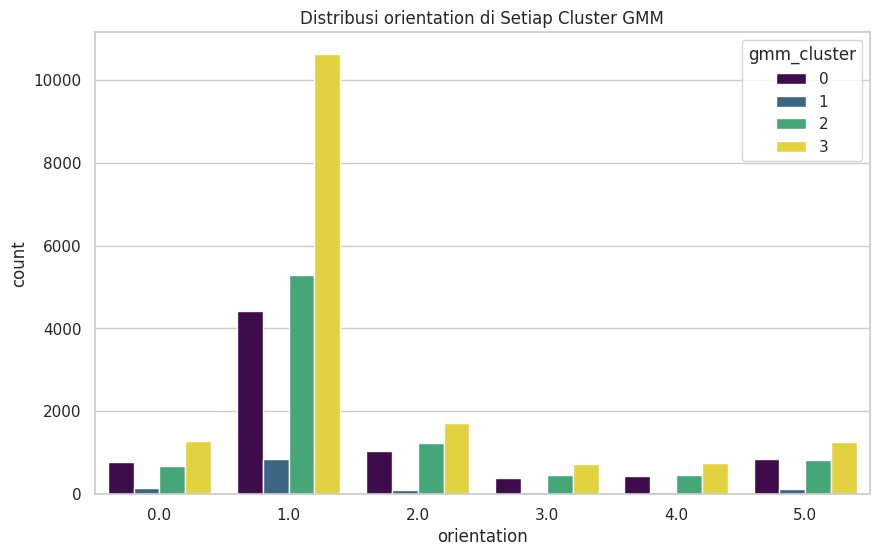

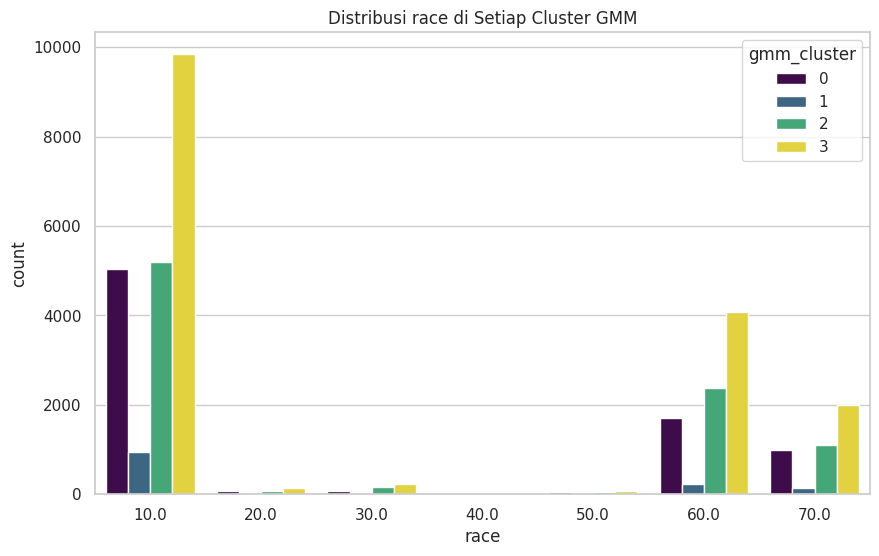

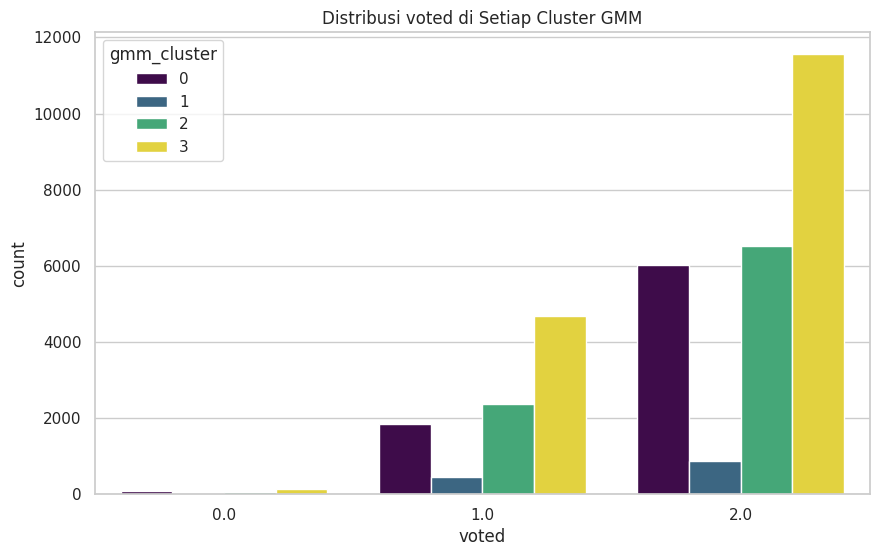

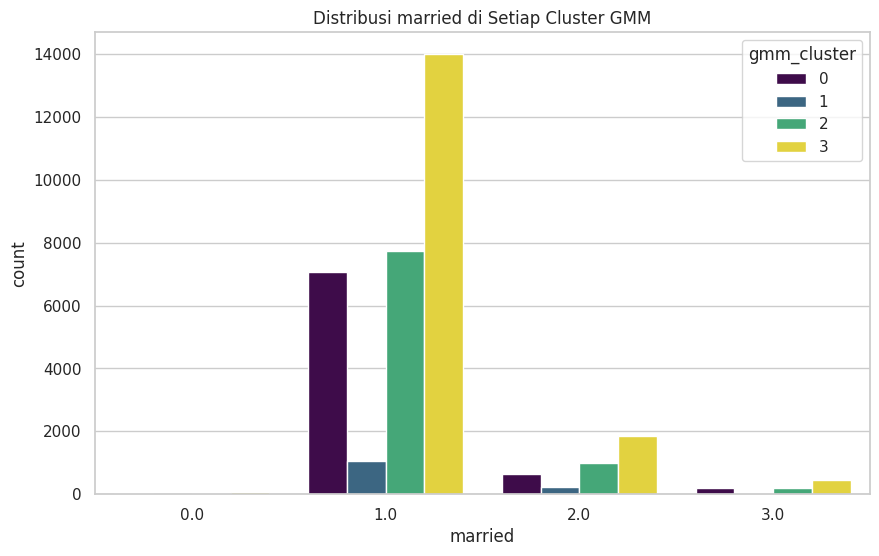

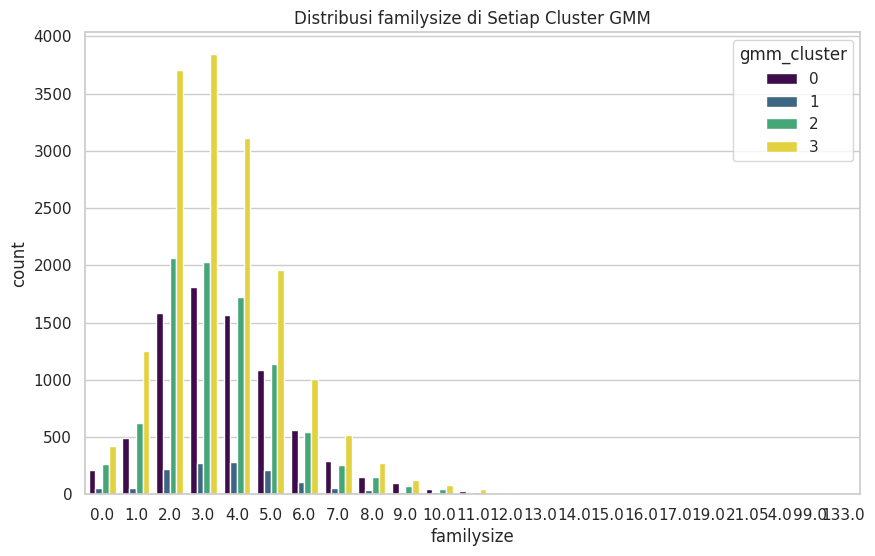

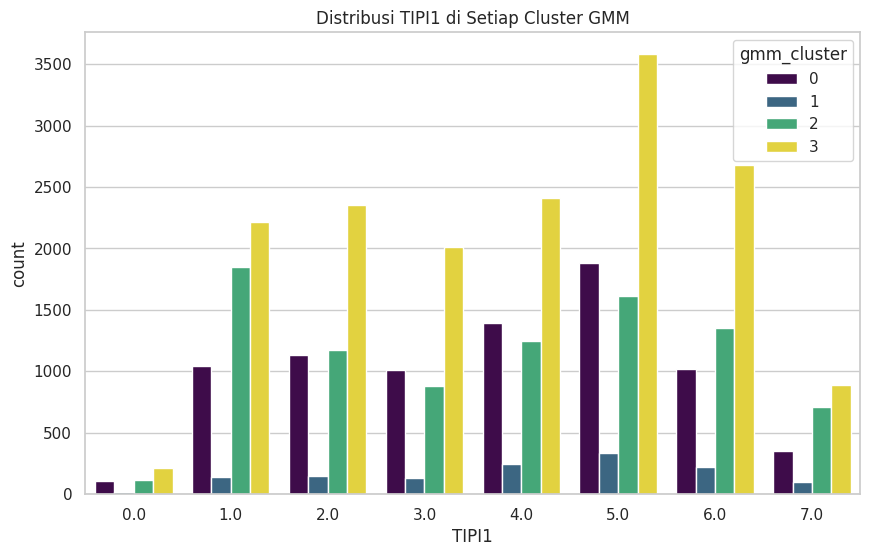

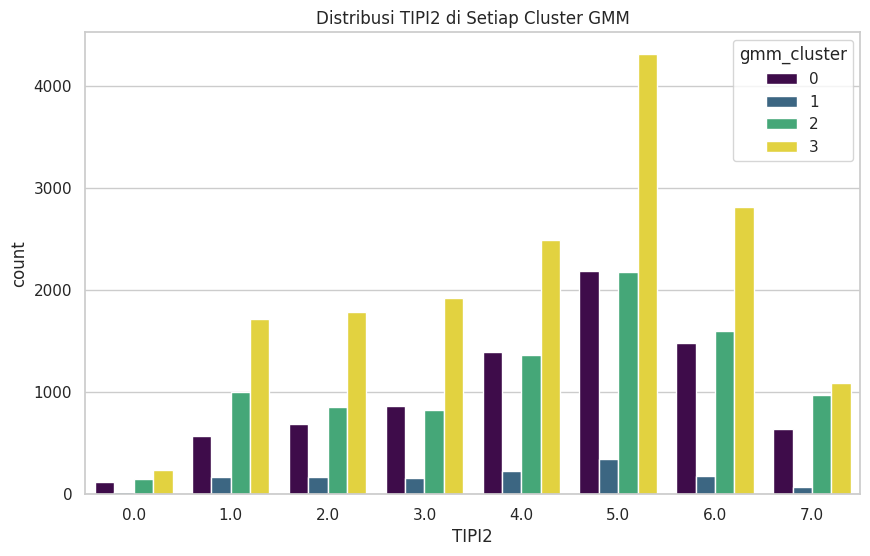

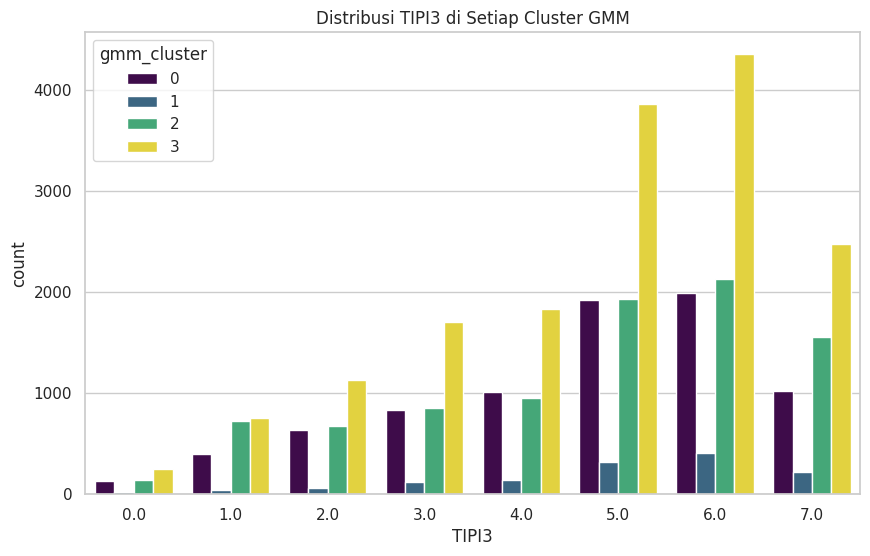

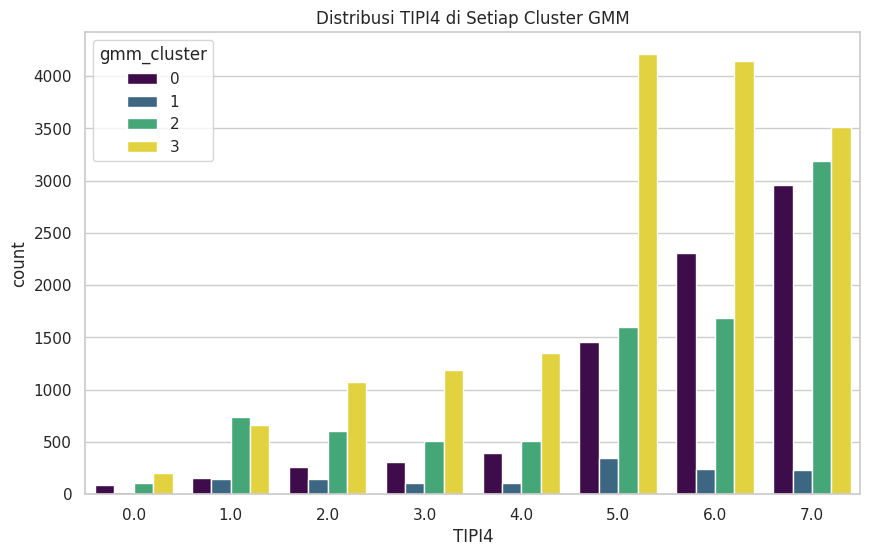

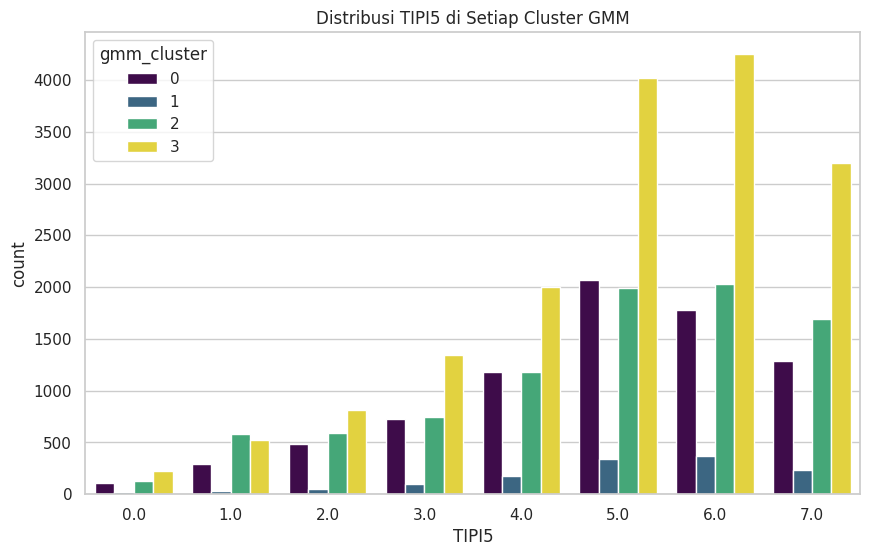

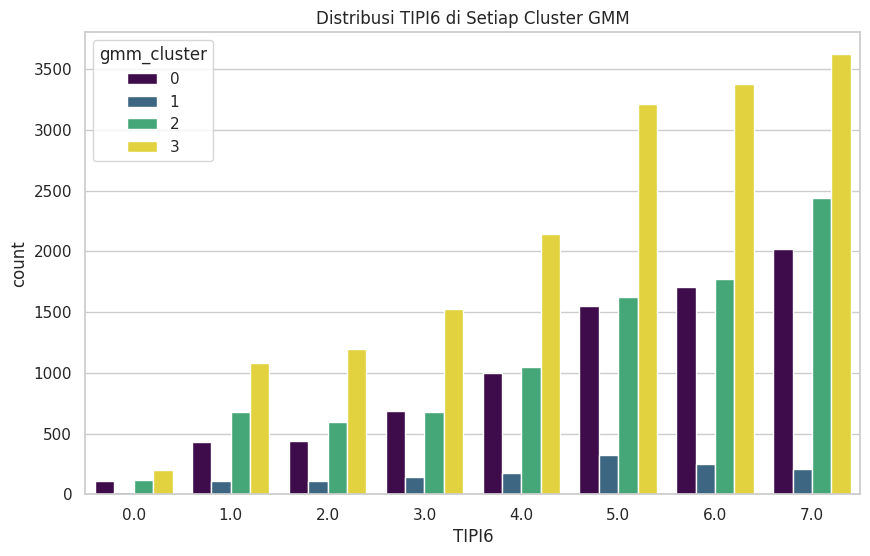

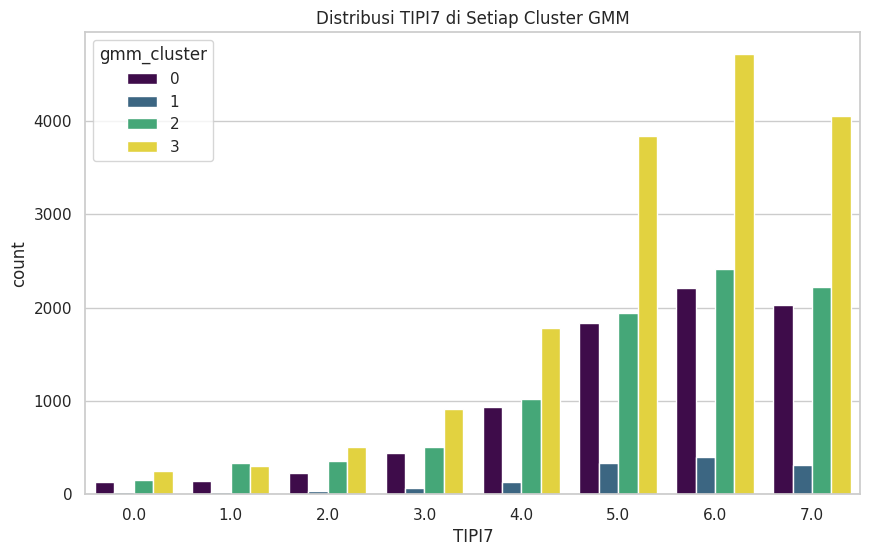

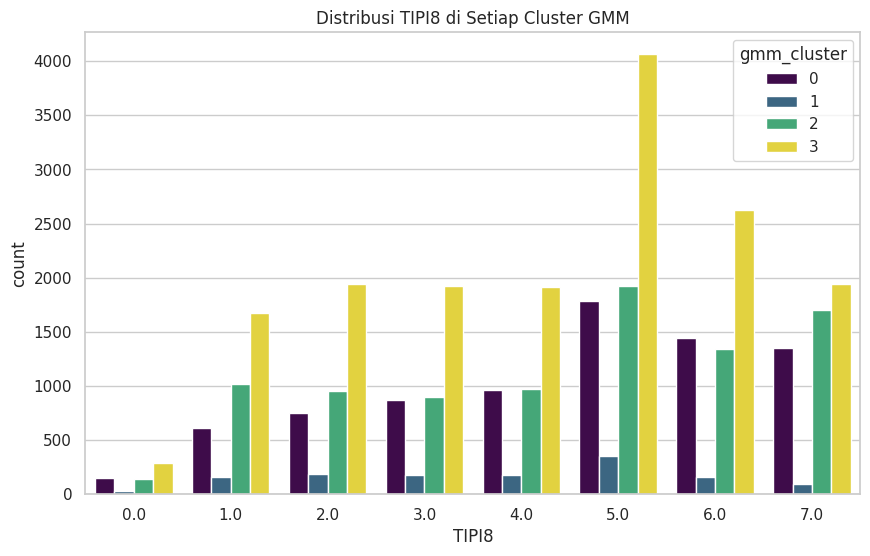

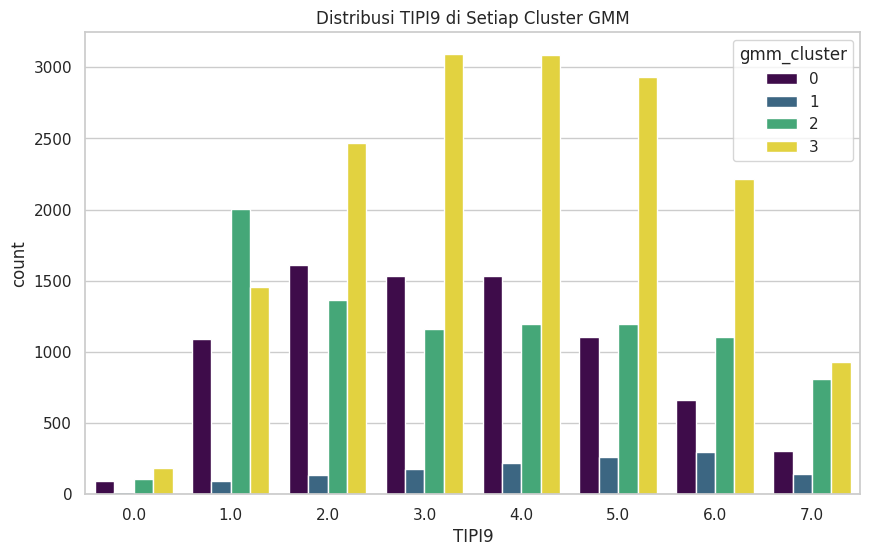

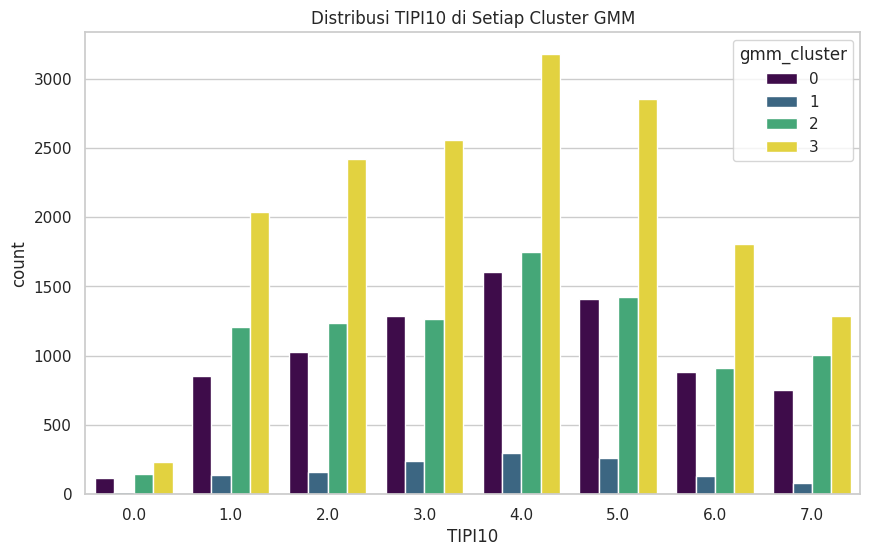

In [ ]:
print("\n--- Analisis Profil Demografi & Kepribadian GMM (SIAPA orangnya?) ---")

# Visualisasi Fitur Numerik dengan Box Plot untuk GMM
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Distribusi Demografi & Kepribadian per Cluster GMM', fontsize=18)

sns.boxplot(x='gmm_cluster', y='age', data=df_bersih, ax=axes[0, 0]).set_title('Distribusi Usia')
sns.boxplot(x='gmm_cluster', y='TIPI4', data=df_bersih, ax=axes[0, 1]).set_title('Distribusi Kepribadian "Cemas, Mudah Kesal"')
sns.boxplot(x='gmm_cluster', y='TIPI9', data=df_bersih, ax=axes[1, 0]).set_title('Distribusi Kepribadian "Tenang, Stabil"')
sns.boxplot(x='gmm_cluster', y='education', data=df_bersih, ax=axes[1, 1]).set_title('Distribusi Tingkat Pendidikan')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Visualisasi Fitur Kategorikal dengan Count Plot untuk GMM
for col in profiling_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='gmm_cluster', data=df_bersih, palette='viridis')
    plt.title(f'Distribusi {col} di Setiap Cluster GMM')
    plt.show()

# Evaluasi dan Visualisasi Hasil Clustering

In [ ]:
print(X_scaled.head())

        Q1A       Q2A       Q3A       Q4A       Q5A       Q6A       Q7A  \
0  1.340379  1.653906 -0.206921  2.002229  1.403513  1.400492  2.051719   
1  1.340379 -1.053133 -0.206921  1.033821  1.403513  1.400492  1.072657   
2  0.367101 -1.053133  1.732623 -0.902994  1.403513  0.443957 -0.885468   
3 -0.606177  0.751560 -0.206921 -0.902994  0.465242  0.443957  2.051719   
4 -0.606177 -0.150787  0.762851  2.002229  1.403513 -0.512579  2.051719   

        Q8A       Q9A      Q10A  ...      Q33A      Q34A      Q35A      Q36A  \
0  1.471134 -0.624170 -1.267216  ... -0.378838  0.322677  1.727632  1.569995   
1  1.471134  0.314991 -0.385514  ...  0.578583 -0.548382 -0.292817  0.663126   
2  0.516232 -0.624170  1.377891  ... -1.336258  1.193736  0.717408  1.569995   
3 -0.438670  0.314991  0.496189  ... -0.378838  1.193736 -1.303042 -1.150611   
4  1.471134  1.254151  0.496189  ...  1.536003  1.193736  0.717408  1.569995   

       Q37A      Q38A      Q39A      Q40A      Q41A      Q42A  
0 -1

[KMeans with ADASYN] Silhouette Score         : 0.133
[KMeans with ADASYN] Calinski-Harabasz Index  : 10864.454
[GMM with ADASYN]    Silhouette Score         : -0.065
[GMM with ADASYN]    Calinski-Harabasz Index  : 1188.580


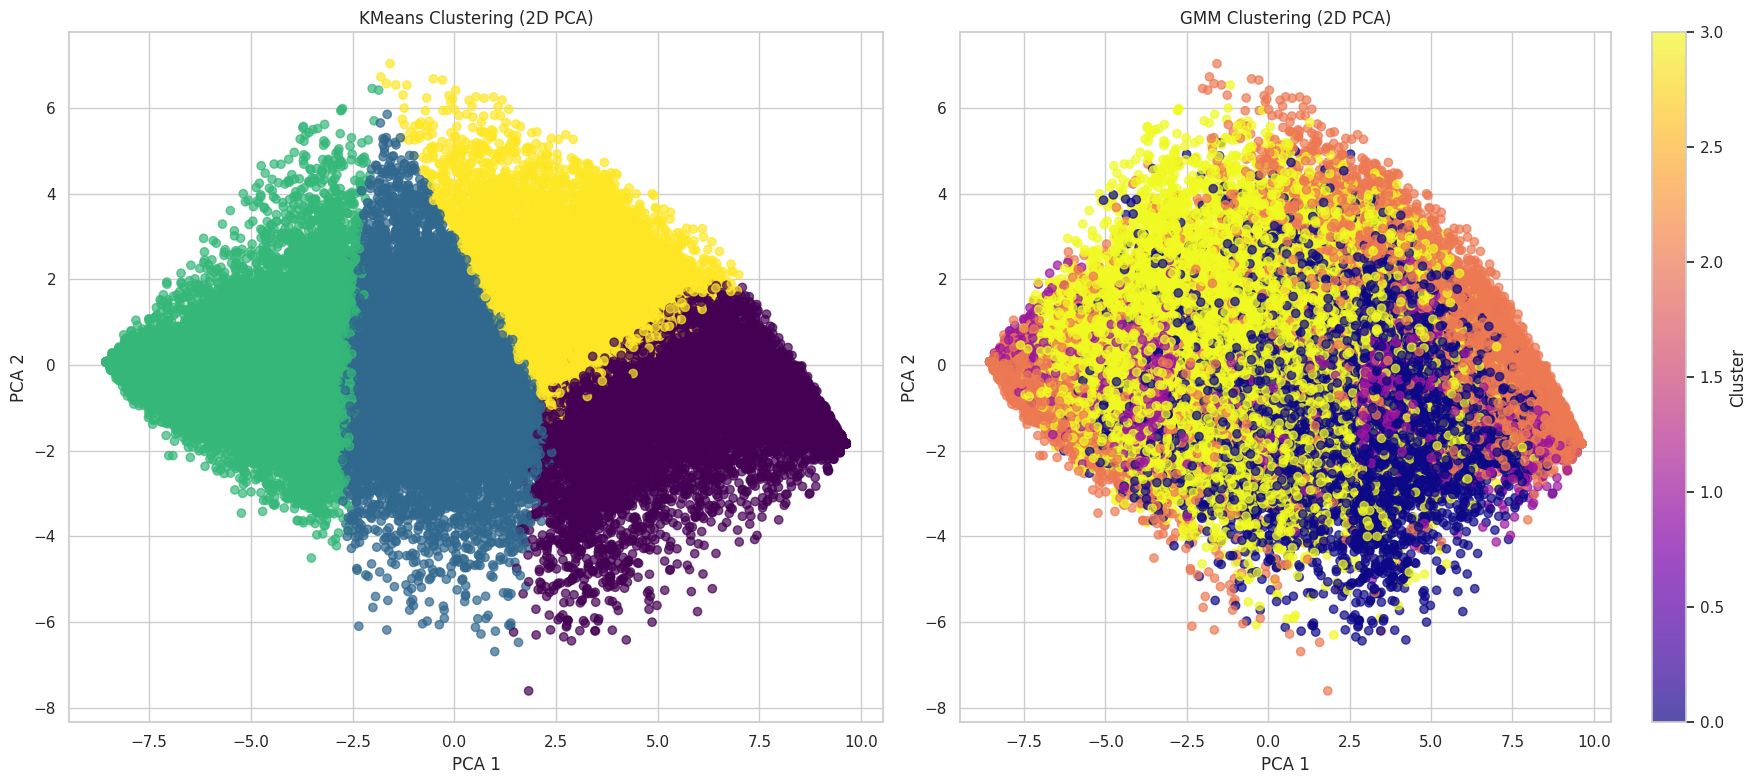

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA untuk visualisasi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Evaluasi KMeans
sil_kmeans = silhouette_score(X_scaled, kmeans_labels)
cal_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)

# Evaluasi GMM
sil_gmm = silhouette_score(X_scaled, gmm_labels)
cal_gmm = calinski_harabasz_score(X_scaled, gmm_labels)

# Tampilkan hasil evaluasi
print(f"[KMeans with ADASYN] Silhouette Score         : {sil_kmeans:.3f}")
print(f"[KMeans with ADASYN] Calinski-Harabasz Index  : {cal_kmeans:.3f}")
print(f"[GMM with ADASYN]    Silhouette Score         : {sil_gmm:.3f}")
print(f"[GMM with ADASYN]    Calinski-Harabasz Index  : {cal_gmm:.3f}")

# Visualisasi KMeans dan GMM secara berdampingan
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# KMeans Plot
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
axes[0].set_title("KMeans Clustering (2D PCA)")
axes[0].set_xlabel("PCA 1")
axes[0].set_ylabel("PCA 2")
axes[0].grid(True)

# GMM Plot
scatter = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='plasma', alpha=0.7)
axes[1].set_title("GMM Clustering (2D PCA)")
axes[1].set_xlabel("PCA 1")
axes[1].set_ylabel("PCA 2")
axes[1].grid(True)

# Colorbar untuk GMM
fig.colorbar(scatter, ax=axes[1], label="Cluster")

plt.tight_layout()
plt.show()